In [1]:
import os
import numpy as np
import pandas as pd
from astropy.table import Table

from lvmdrp import path, __version__ as drpver
from lvmdrp.utils import metadata as md
from lvmdrp.core.constants import SPEC_CHANNELS
from lvmdrp.core import rss
from lvmdrp.functions import run_drp as drp
from lvmdrp.functions import imageMethod, rssMethod

ORIG_MASTER_DIR = os.getenv("LVM_MASTER_DIR")
MASTER_CON_LAMPS = {"b": "ldls", "r": "ldls", "z": "quartz"}
MASTER_ARC_LAMPS = {"b": "hgne", "r": "neon", "z": "neon"}

In [2]:
frames_table = md.get_metadata(tileid="*", mjd=60177)
frames_table.query("imagetyp == 'bias' | imagetyp == 'dark' | imagetyp == 'flat' | imagetyp == 'arc'", inplace=True)
frames_table = frames_table.loc[frames_table.name.str.contains("sdR")]

[INFO]: loading metadata store at /home/mejia/Research/UNAM/lvm-drp/lvmdrp/examples/data/lco_com/data.sdss5.org/sas/sdsswork/lvm/spectro/redux/0.1.1.dev0/1111/60177/raw_metadata.hdf5
[INFO]: found 558 frames in store '/home/mejia/Research/UNAM/lvm-drp/lvmdrp/examples/data/lco_com/data.sdss5.org/sas/sdsswork/lvm/spectro/redux/0.1.1.dev0/1111/60177/raw_metadata.hdf5'
[INFO]: number of frames after filtering 558
[INFO]: total number of frames found 558


In [3]:
masters_mjd = frames_table.mjd.min()
masters_path = os.path.join(ORIG_MASTER_DIR, f"{masters_mjd}")
os.makedirs(masters_path, exist_ok=True)

In [4]:
masters_arc = md.get_metadata(kind="master", imagetyp="arc").query("mjd == @masters_mjd").sort_values("camera")
masters_arc

[INFO]: loading metadata store at /home/mejia/Research/UNAM/lvm-drp/lvmdrp/examples/data/lco_com/data.sdss5.org/sas/sdsswork/lvm/spectro/redux/0.1.1.dev0/master_metadata.hdf5
[INFO]: found 36 frames in store '/home/mejia/Research/UNAM/lvm-drp/lvmdrp/examples/data/lco_com/data.sdss5.org/sas/sdsswork/lvm/spectro/redux/0.1.1.dev0/master_metadata.hdf5'
[INFO]: filtering by imagetyp = 'arc'
[INFO]: number of frames after filtering 18
[INFO]: total number of frames found 18


tileid    mjd   rmjd imagetyp spec camera  exptime   neon   hgne  krypton  \
12    1111  60177  60177      arc  sp1     b1    150.0  False   True    False   
9     1111  60177  60177      arc  sp2     b2    150.0  False   True    False   
11    1111  60177  60177      arc  sp3     b3    150.0  False   True    False   
16    1111  60177  60177      arc  sp1     r1     10.0   True  False    False   
14    1111  60177  60177      arc  sp2     r2     10.0   True  False    False   
15    1111  60177  60177      arc  sp3     r3    150.0   True  False    False   
10    1111  60177  60177      arc  sp1     z1     10.0   True  False    False   
13    1111  60177  60177      arc  sp2     z2     10.0   True  False    False   
17    1111  60177  60177      arc  sp3     z3    150.0   True  False    False   

    ...  argon   ldls  quartz    quality qual  stage  status  drpqual  \
12  ...  False  False   False  excellent    0      1       0        0   
9   ...  False  False   False  excellent    0      1       0        0   
11  ...  False  False   False  excellent    0      1       0        0   
16  ...  False  False   False  excellent    0      1       0        0   
14  ...  False  False   False  excellent    0      1       0        0   
15  ...  False  False   False  excellent    0      1       0  4194304   
10  ...  False  False   False  excellent    0      1       0        0   
13  ...  False  False   False  excellent    0      1       0        0   
17  ...  False  False   False  excellent    0      1       0        0   

    nframes              name  
12        4  lvm-marc_hgne-b1  
9         4  lvm-marc_hgne-b2  
11        4  lvm-marc_hgne-b3  
16        4  lvm-marc_neon-r1  
14        4  lvm-marc_neon-r2  
15        4  lvm-marc_neon-r3  
10        4  lvm-marc_neon-z1  
13        4  lvm-marc_neon-z2  
17        4  lvm-marc_neon-z3  

[9 rows x 21 columns]

[INFO]: pixel-to-wavelength map in file '/home/mejia/Research/UNAM/lvm-drp/lvmdrp/python/lvmdrp/etc/wavelength/lvm-pixwav-hgne_b1.txt'
[INFO]: going to use fiber 319 as reference
[INFO]: number of lines in file 11 percentage masked  45.4545 %
[INFO]: going to use 6 lines
[INFO]: reading arc from '/home/mejia/Research/UNAM/lvm-drp/lvmdrp/examples/data/lco_com/data.sdss5.org/sas/sdsswork/lvm/spectro/redux/0.1.1.dev0/1111/60177/calib/lvm-wmarc_hgne-b1.fits'
[INFO]: loading reference lines for lamp = 'hgne' in camera = 'b1'
[INFO]: pixel-to-wavelength map in file '/home/mejia/Research/UNAM/lvm-drp/lvmdrp/python/lvmdrp/etc/wavelength/lvm-pixwav-hgne_b1.txt'
[INFO]: going to use fiber 319 as reference
[INFO]: number of lines in file 11 percentage masked  45.4545 %
[INFO]: going to use 6 lines
[INFO]: measuring arc lines for each fiber from reference fiber 319, flux_min = 1e-12, fwhm_max = 5 and relative flux limits [0.001, 1000000000000.0]
measuring arc lines upwards from ref_fiber = 319: 10

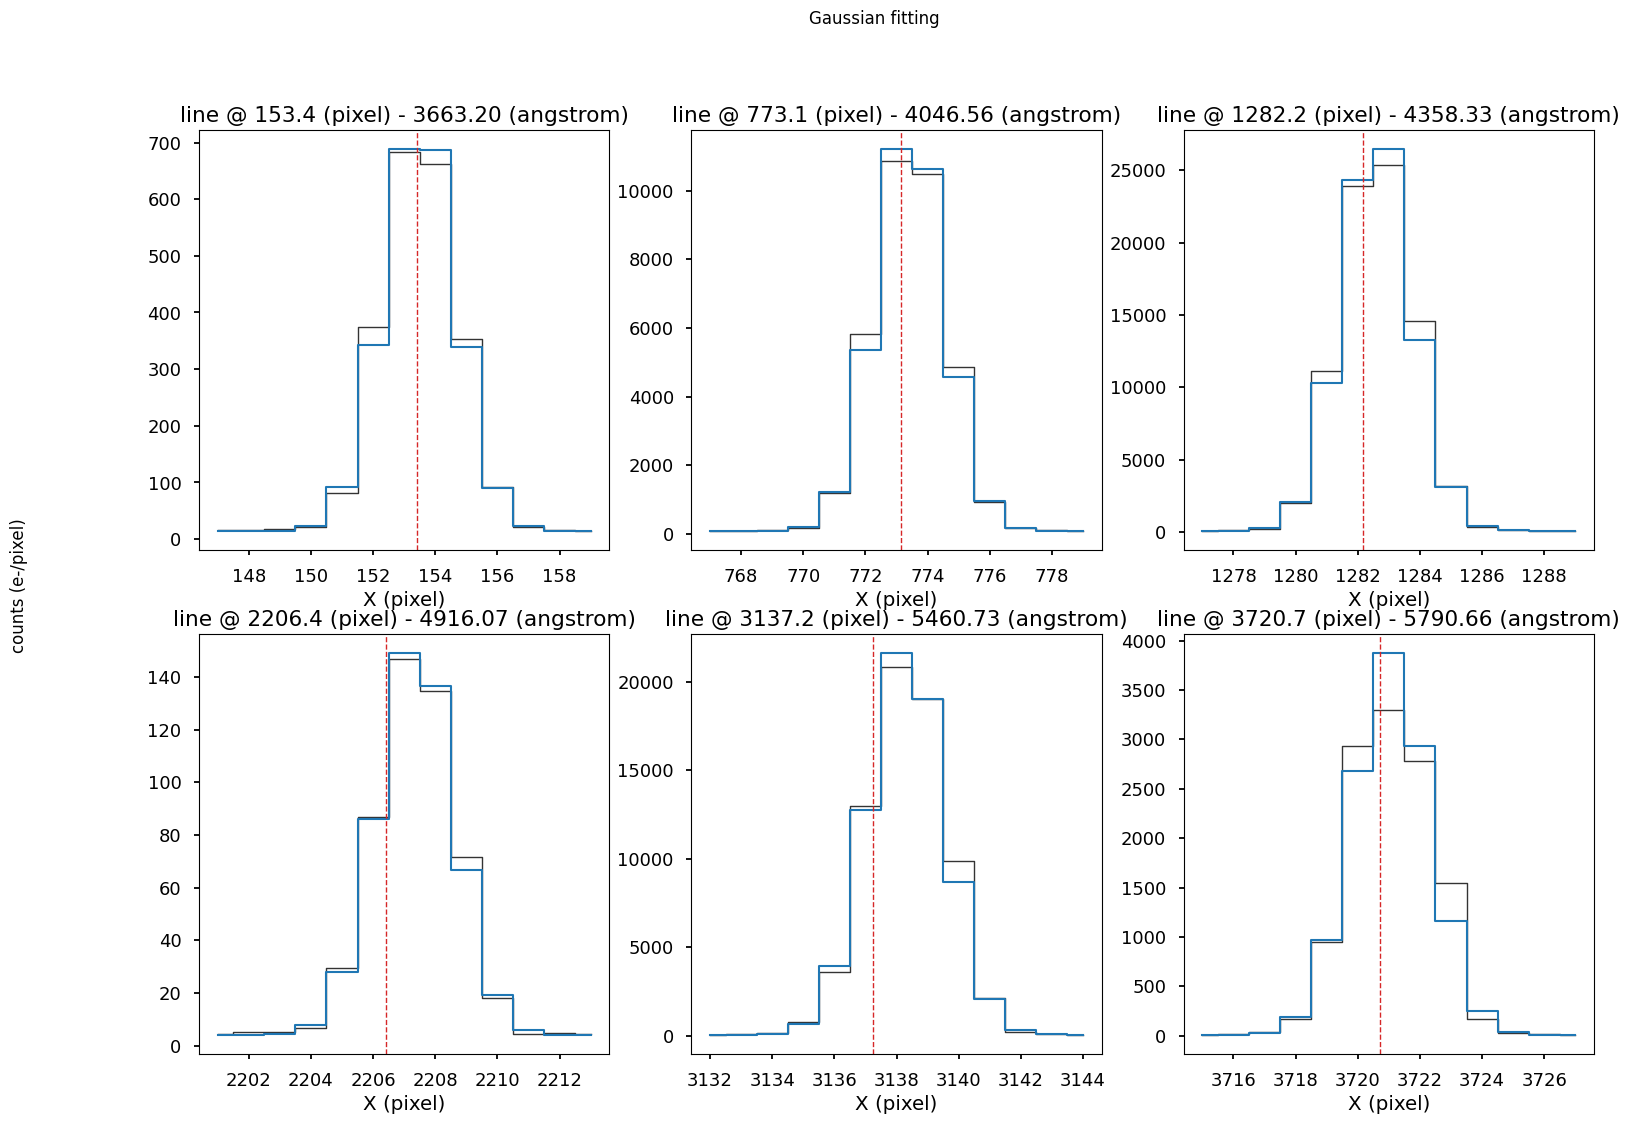

[INFO]: smoothing FWHM of guess lines along cross-dispersion axis using 2-deg polynomials
[INFO]: fitting wavelength solutions using 4-deg polynomials
[WARNING]: fiber 1 has all lines masked
[WARNING]: fiber 109 has all lines masked
[WARNING]: fiber 217 has all lines masked
[WARNING]: fiber 289 has all lines masked
[WARNING]: fiber 325 has all lines masked
[WARNING]: fiber 397 has all lines masked
[WARNING]: fiber 414 has all lines masked
[WARNING]: fiber 462 has all lines masked
[WARNING]: fiber 505 has all lines masked
[WARNING]: fiber 613 has all lines masked
[INFO]: finished wavelength fitting with median RMS = 0.0720343 AA (0.121799 pix)
[INFO]: fitting LSF solutions using 2-deg polynomials
[INFO]: finished LSF fitting with median RMS = 0.0460841 AA (0.0775601 pix)


<Figure size 1040x715 with 0 Axes>

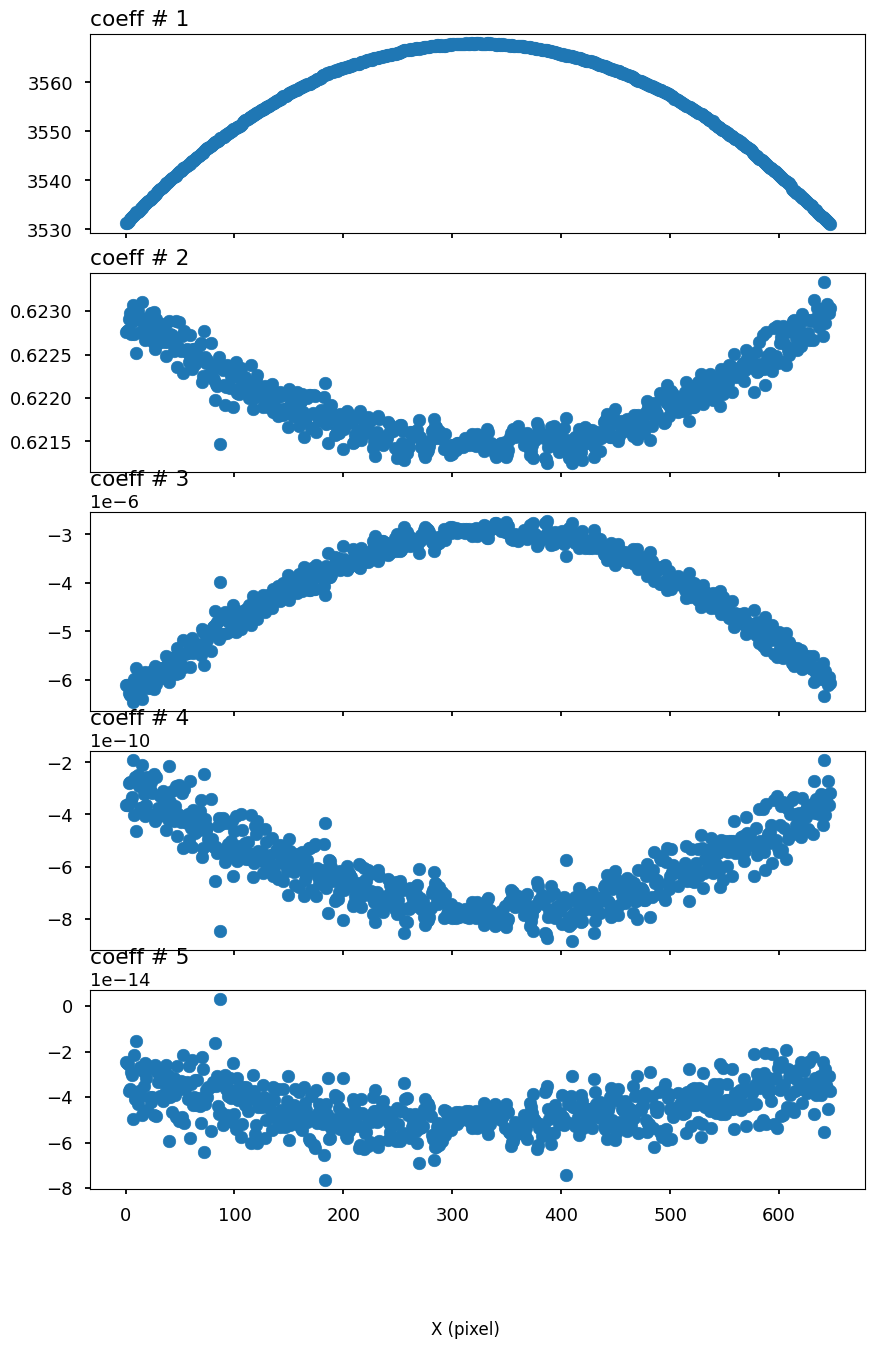

<Figure size 1040x715 with 0 Axes>

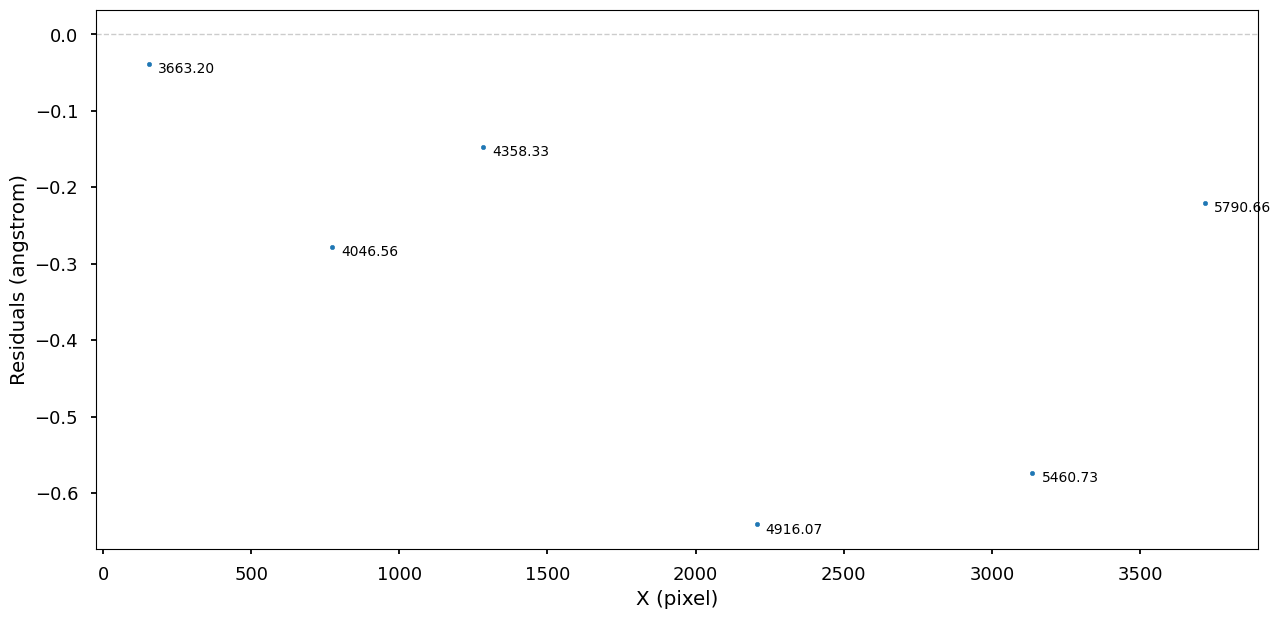

<Figure size 1040x715 with 0 Axes>

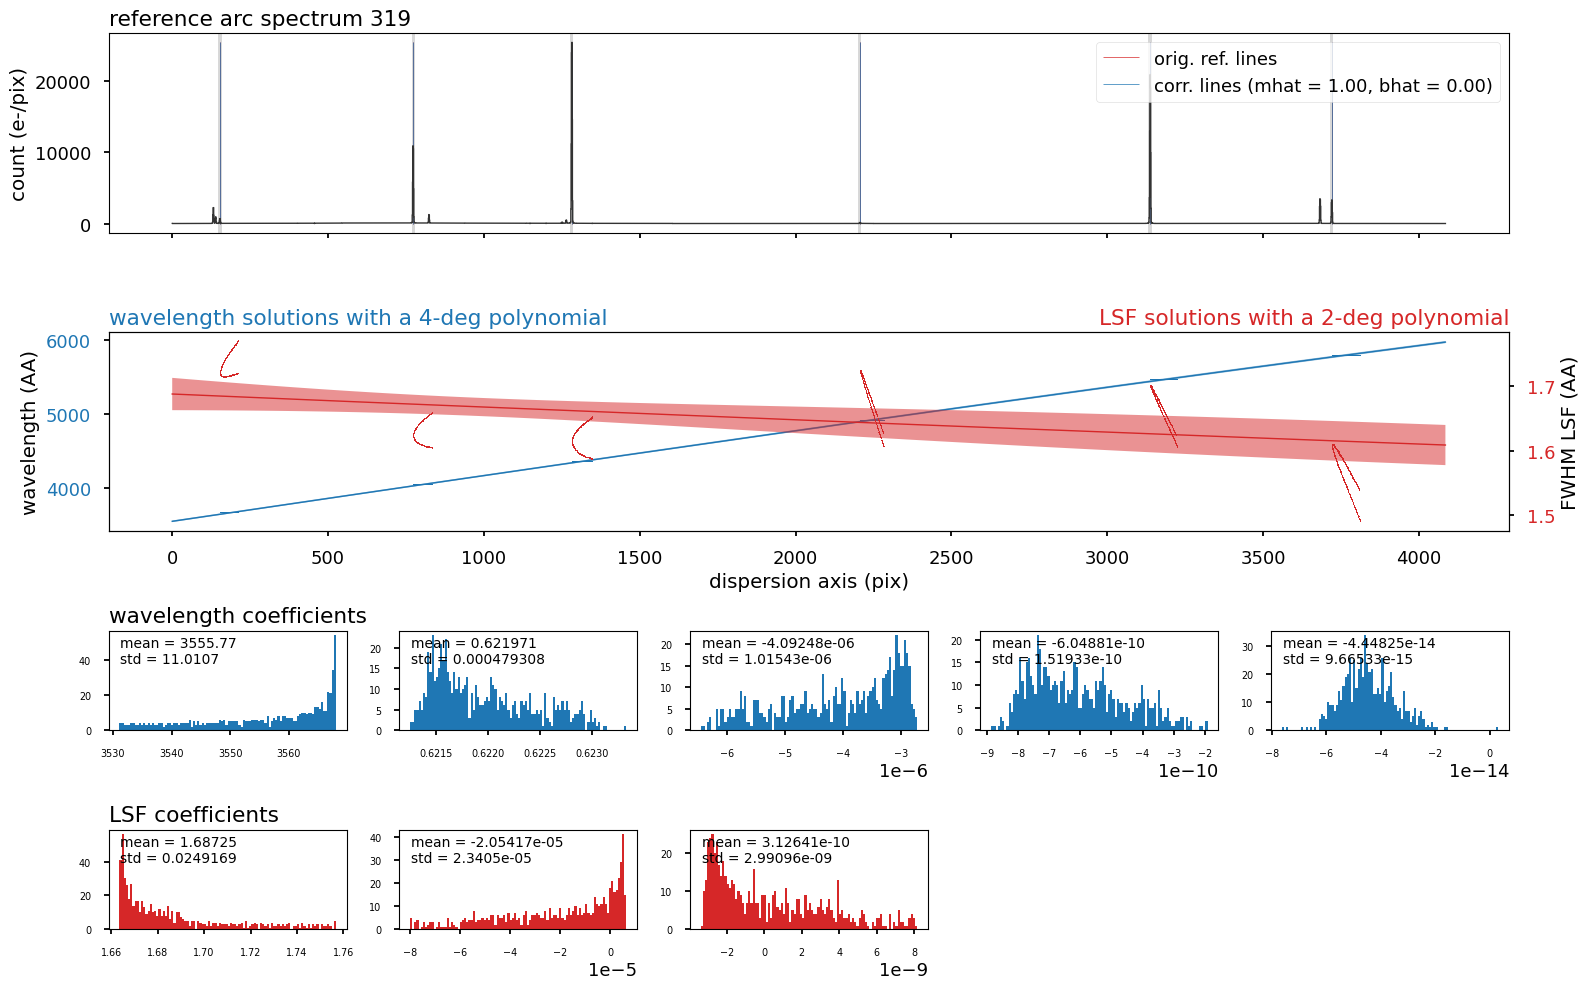

[INFO]: updating header and writing wavelength/LSF to '/home/mejia/Research/UNAM/lvm-drp/lvmdrp/examples/lco_com/data_calib/60177/lvm-mwave_hgne-b1.fits' and '/home/mejia/Research/UNAM/lvm-drp/lvmdrp/examples/lco_com/data_calib/60177/lvm-mlsf_hgne-b1.fits'
[INFO]: pixel-to-wavelength map in file '/home/mejia/Research/UNAM/lvm-drp/lvmdrp/python/lvmdrp/etc/wavelength/lvm-pixwav-hgne_b2.txt'
[INFO]: going to use fiber 319 as reference
[INFO]: number of lines in file 11 percentage masked  45.4545 %
[INFO]: going to use 6 lines
[INFO]: reading arc from '/home/mejia/Research/UNAM/lvm-drp/lvmdrp/examples/data/lco_com/data.sdss5.org/sas/sdsswork/lvm/spectro/redux/0.1.1.dev0/1111/60177/calib/lvm-wmarc_hgne-b2.fits'
[INFO]: loading reference lines for lamp = 'hgne' in camera = 'b2'
[INFO]: pixel-to-wavelength map in file '/home/mejia/Research/UNAM/lvm-drp/lvmdrp/python/lvmdrp/etc/wavelength/lvm-pixwav-hgne_b2.txt'
[INFO]: going to use fiber 319 as reference
[INFO]: number of lines in file 11 per

<Figure size 1040x715 with 0 Axes>

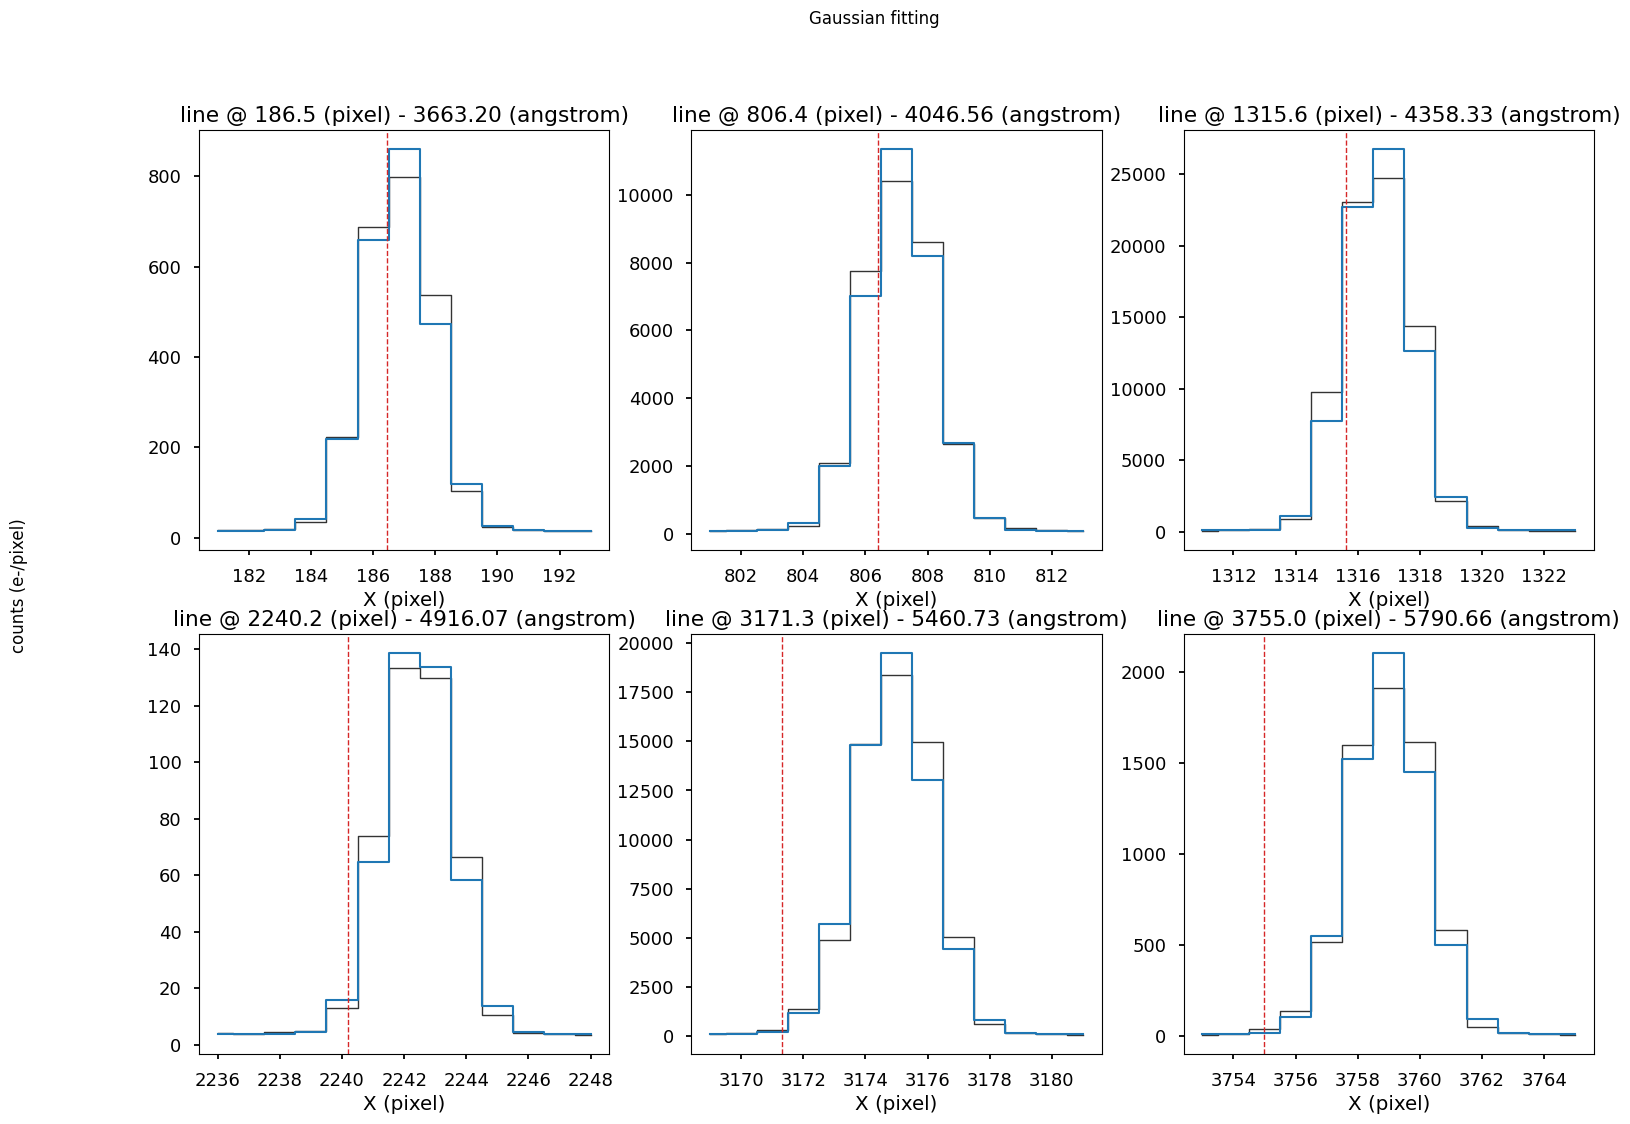

[INFO]: smoothing FWHM of guess lines along cross-dispersion axis using 2-deg polynomials
[INFO]: fitting wavelength solutions using 4-deg polynomials
[WARNING]: fiber 1 has all lines masked
[WARNING]: fiber 109 has all lines masked
[WARNING]: fiber 217 has all lines masked
[WARNING]: fiber 281 has all lines masked
[WARNING]: fiber 289 has all lines masked
[WARNING]: fiber 325 has all lines masked
[WARNING]: fiber 397 has all lines masked
[WARNING]: fiber 505 has all lines masked
[WARNING]: fiber 557 has all lines masked
[WARNING]: fiber 580 has all lines masked
[WARNING]: fiber 613 has all lines masked
[INFO]: finished wavelength fitting with median RMS = 0.0710406 AA (0.119906 pix)
[INFO]: fitting LSF solutions using 2-deg polynomials
[INFO]: finished LSF fitting with median RMS = 0.0312078 AA (0.0529331 pix)


<Figure size 1040x715 with 0 Axes>

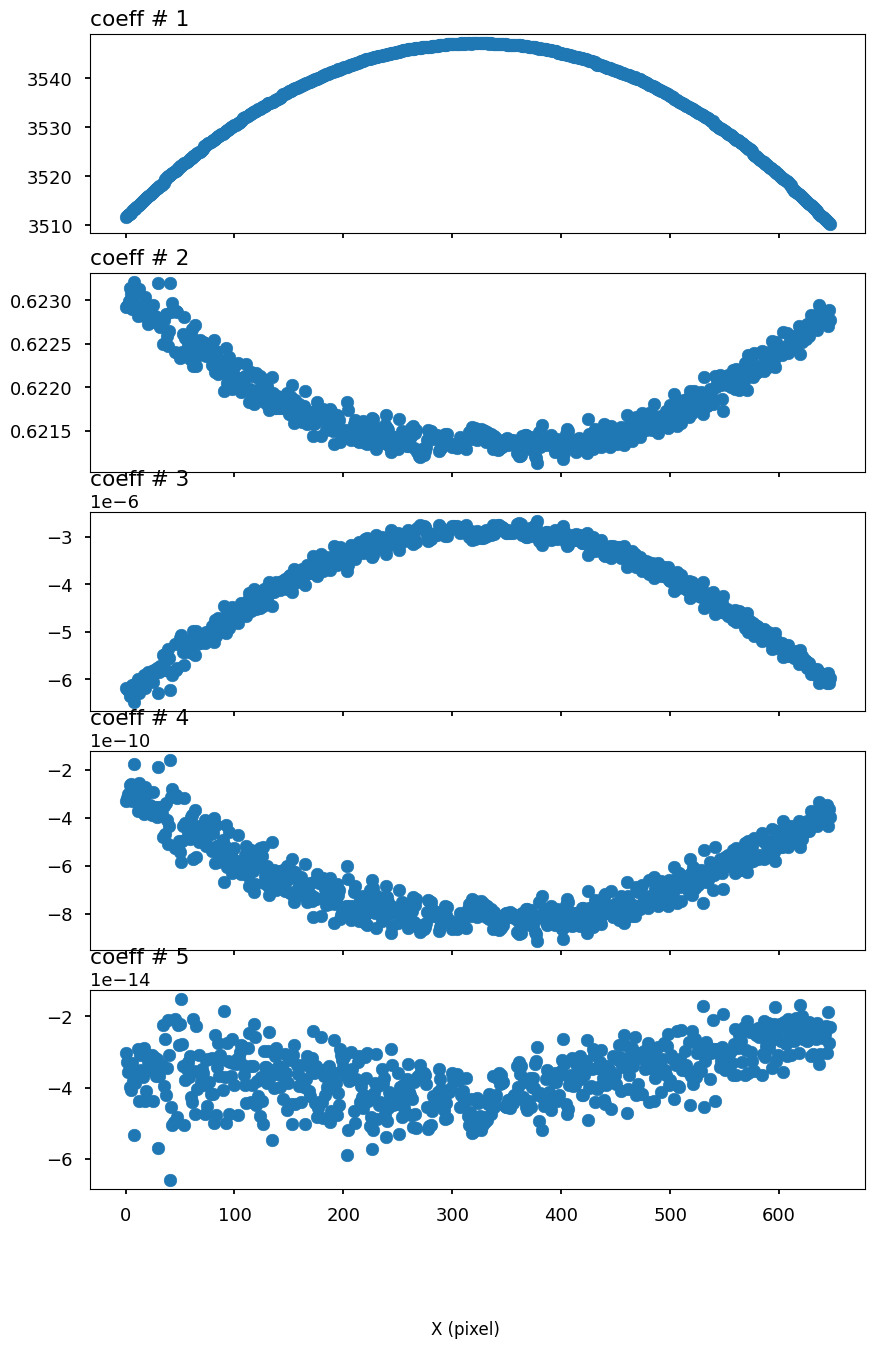

<Figure size 1040x715 with 0 Axes>

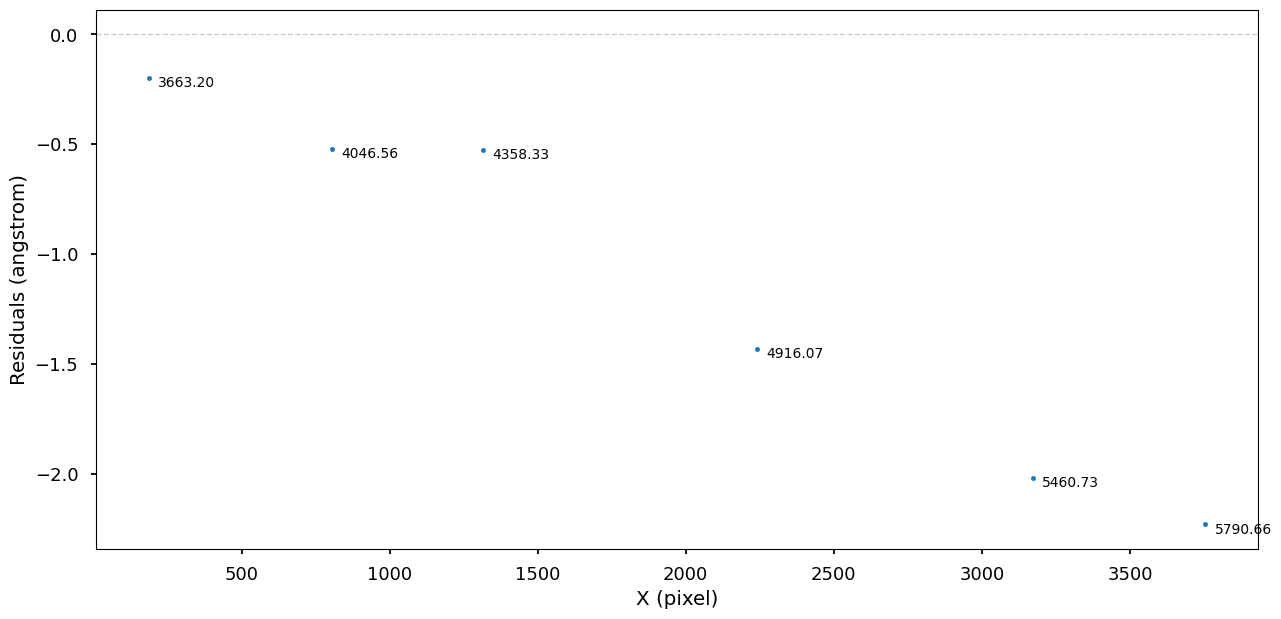

<Figure size 1040x715 with 0 Axes>

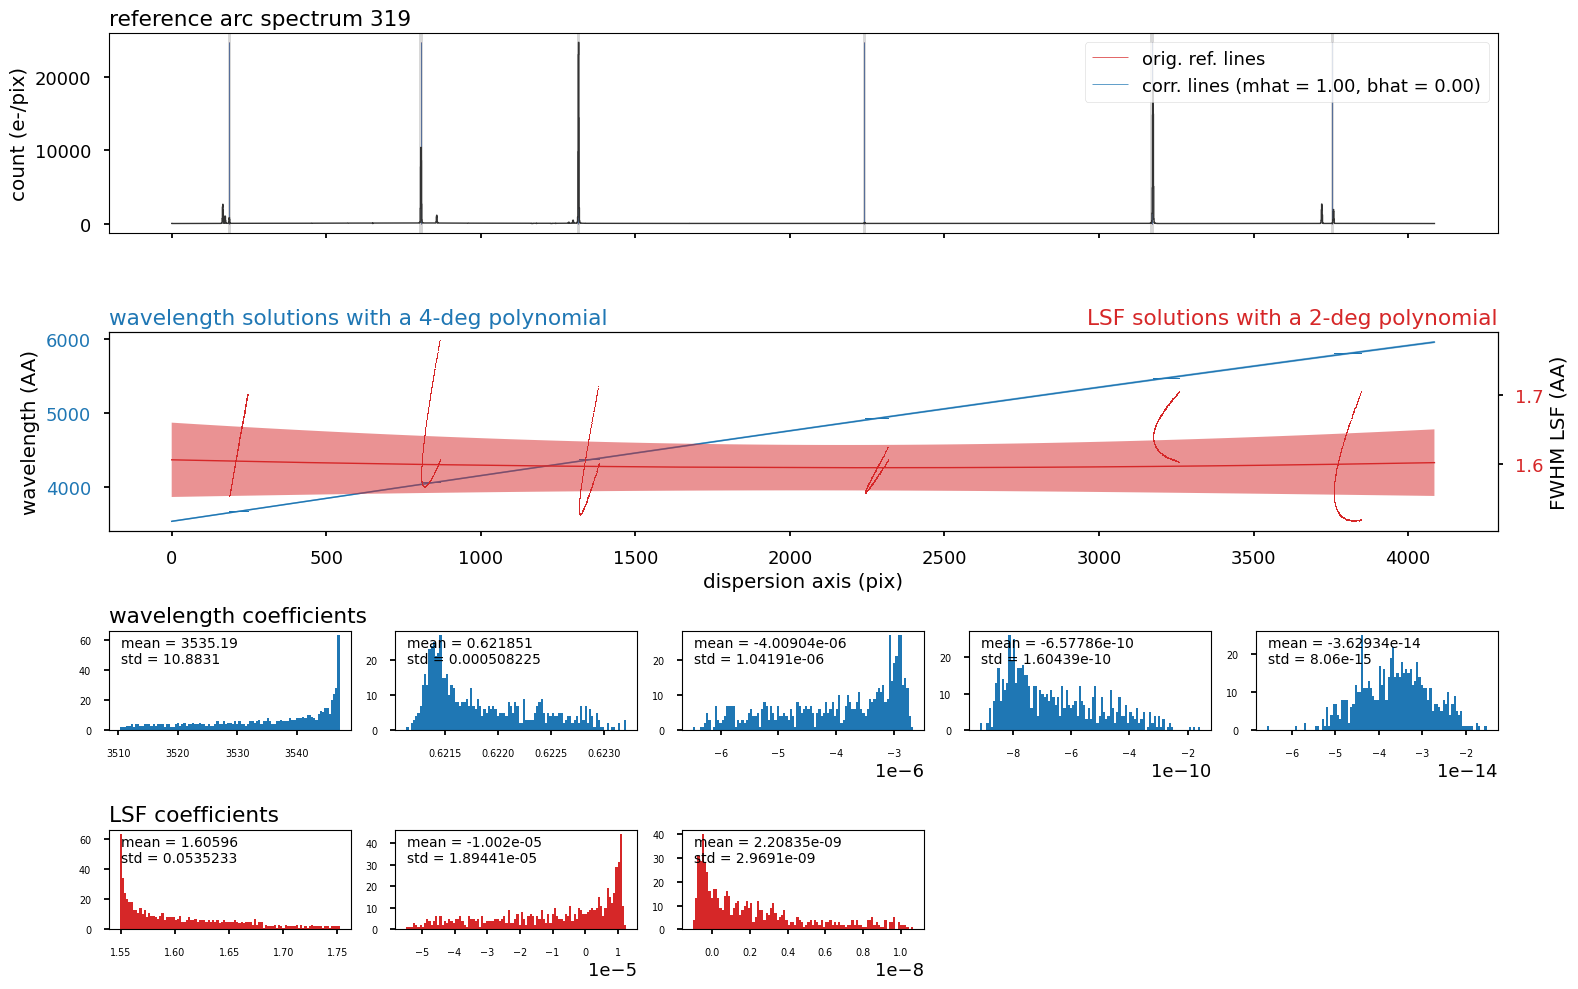

[INFO]: updating header and writing wavelength/LSF to '/home/mejia/Research/UNAM/lvm-drp/lvmdrp/examples/lco_com/data_calib/60177/lvm-mwave_hgne-b2.fits' and '/home/mejia/Research/UNAM/lvm-drp/lvmdrp/examples/lco_com/data_calib/60177/lvm-mlsf_hgne-b2.fits'
[INFO]: pixel-to-wavelength map in file '/home/mejia/Research/UNAM/lvm-drp/lvmdrp/python/lvmdrp/etc/wavelength/lvm-pixwav-hgne_b3.txt'
[INFO]: going to use fiber 319 as reference
[INFO]: number of lines in file 11 percentage masked  45.4545 %
[INFO]: going to use 6 lines
[INFO]: reading arc from '/home/mejia/Research/UNAM/lvm-drp/lvmdrp/examples/data/lco_com/data.sdss5.org/sas/sdsswork/lvm/spectro/redux/0.1.1.dev0/1111/60177/calib/lvm-wmarc_hgne-b3.fits'
[INFO]: loading reference lines for lamp = 'hgne' in camera = 'b3'
[INFO]: pixel-to-wavelength map in file '/home/mejia/Research/UNAM/lvm-drp/lvmdrp/python/lvmdrp/etc/wavelength/lvm-pixwav-hgne_b3.txt'
[INFO]: going to use fiber 319 as reference
[INFO]: number of lines in file 11 per

<Figure size 1040x715 with 0 Axes>

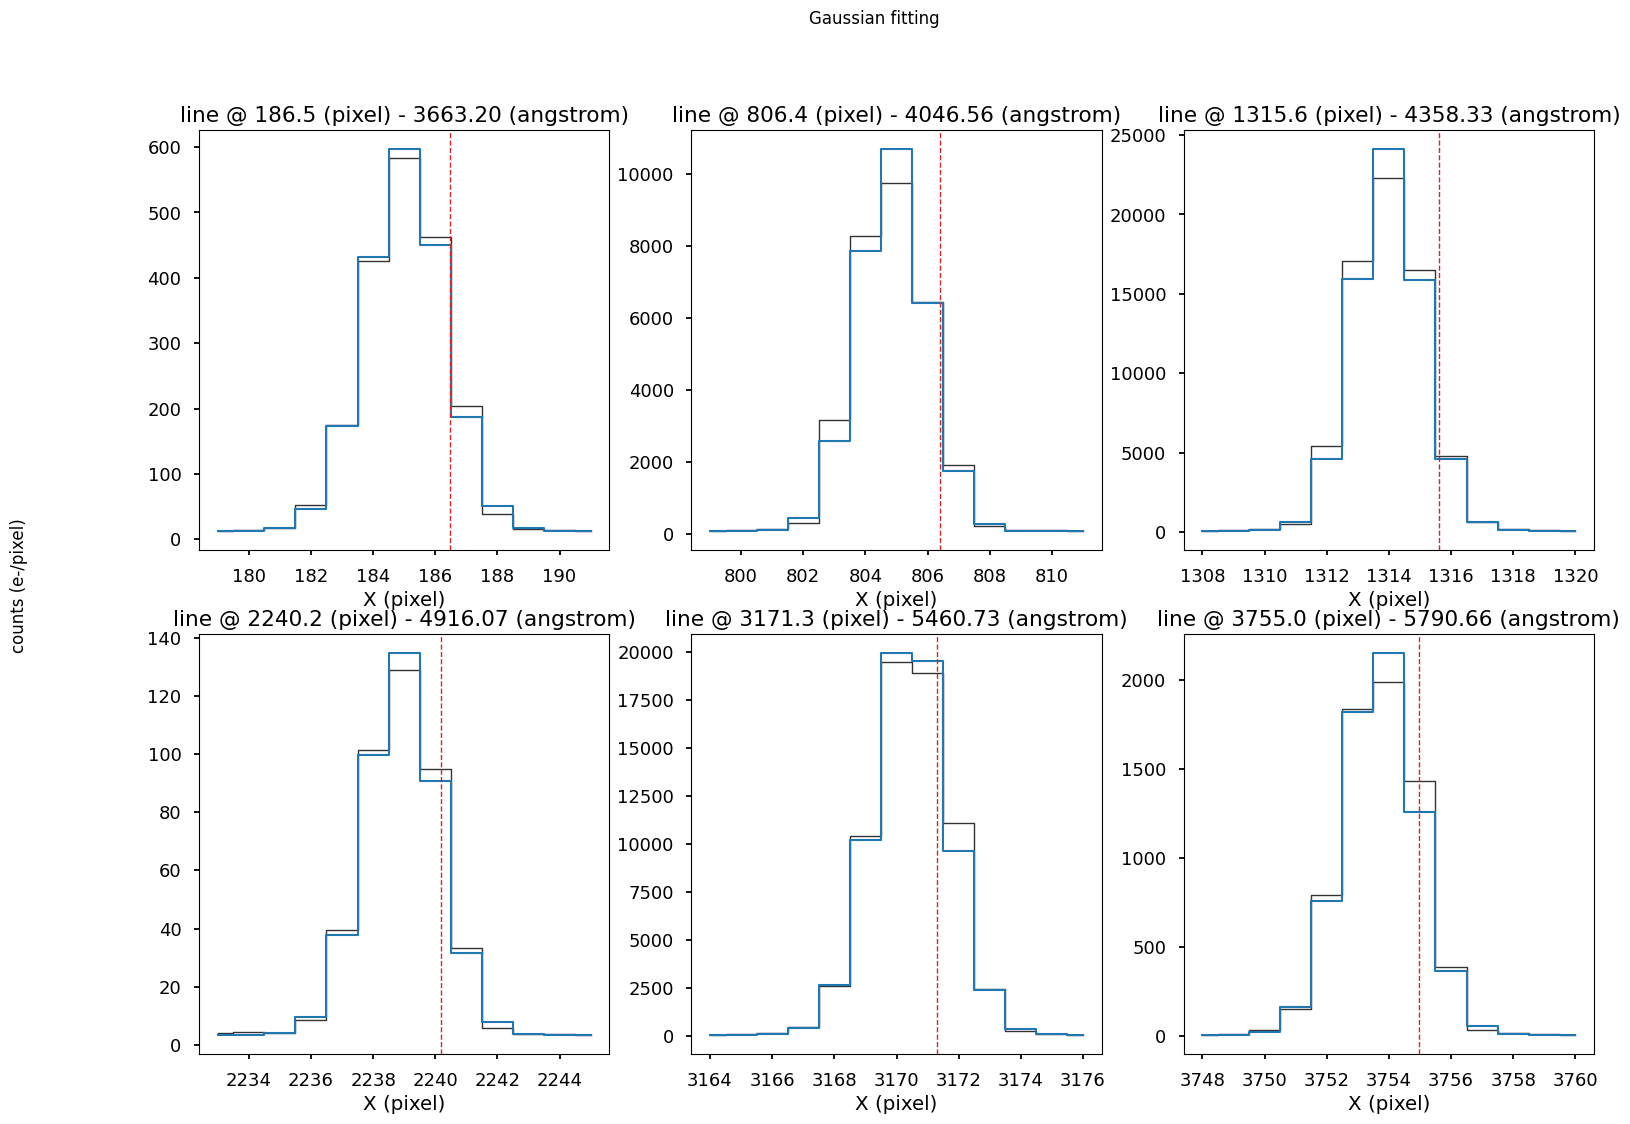

[INFO]: smoothing FWHM of guess lines along cross-dispersion axis using 2-deg polynomials
[INFO]: fitting wavelength solutions using 4-deg polynomials
[WARNING]: fiber 109 has all lines masked
[WARNING]: fiber 217 has all lines masked
[WARNING]: fiber 281 has all lines masked
[WARNING]: fiber 289 has all lines masked
[WARNING]: fiber 325 has all lines masked
[WARNING]: fiber 397 has all lines masked
[WARNING]: fiber 447 has all lines masked
[WARNING]: fiber 505 has all lines masked
[WARNING]: fiber 556 has all lines masked
[WARNING]: fiber 575 has all lines masked
[WARNING]: fiber 580 has all lines masked
[WARNING]: fiber 613 has all lines masked
[INFO]: finished wavelength fitting with median RMS = 0.0754913 AA (0.127509 pix)
[INFO]: fitting LSF solutions using 2-deg polynomials
[INFO]: finished LSF fitting with median RMS = 0.0688591 AA (0.115987 pix)


<Figure size 1040x715 with 0 Axes>

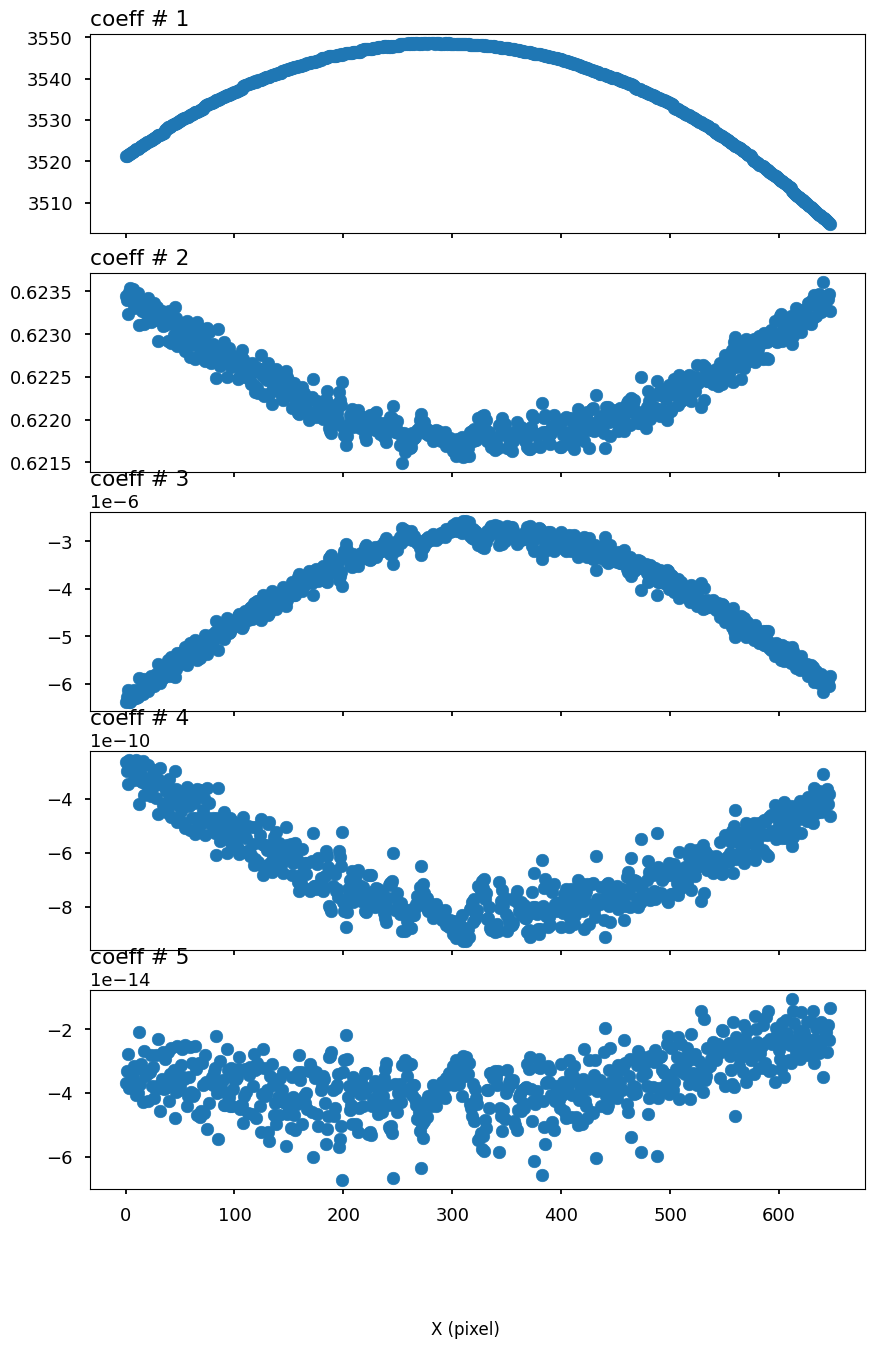

<Figure size 1040x715 with 0 Axes>

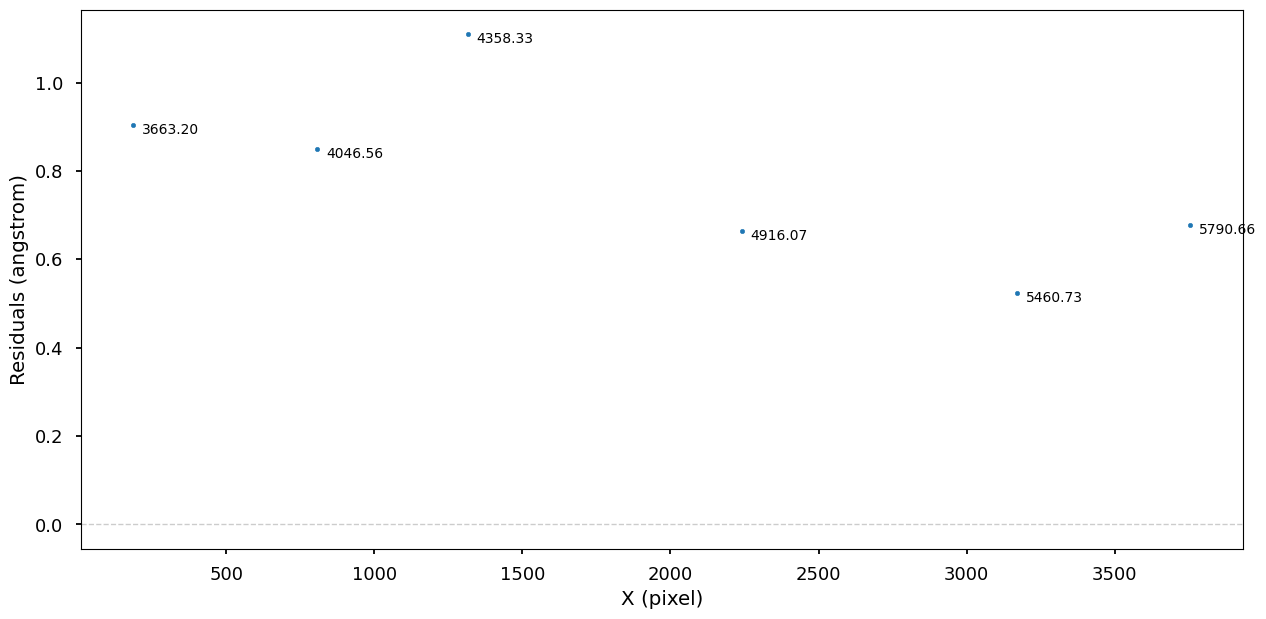

<Figure size 1040x715 with 0 Axes>

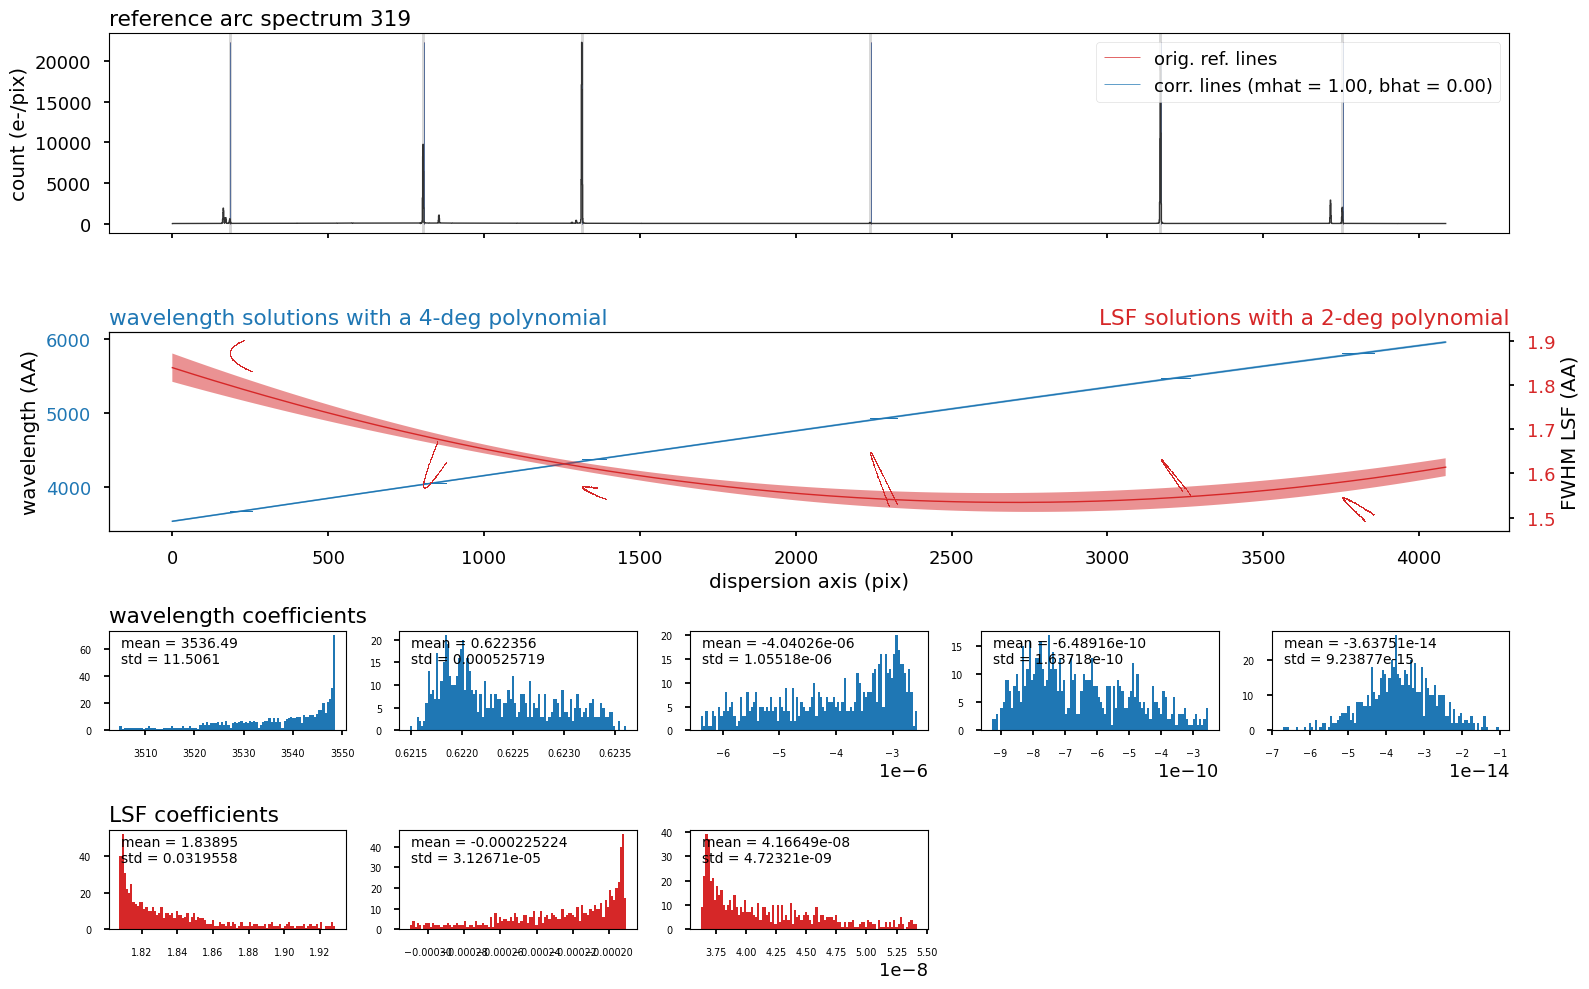

[INFO]: updating header and writing wavelength/LSF to '/home/mejia/Research/UNAM/lvm-drp/lvmdrp/examples/lco_com/data_calib/60177/lvm-mwave_hgne-b3.fits' and '/home/mejia/Research/UNAM/lvm-drp/lvmdrp/examples/lco_com/data_calib/60177/lvm-mlsf_hgne-b3.fits'
[INFO]: pixel-to-wavelength map in file '/home/mejia/Research/UNAM/lvm-drp/lvmdrp/python/lvmdrp/etc/wavelength/lvm-pixwav-neon_r1.txt'
[INFO]: going to use fiber 319 as reference
[INFO]: number of lines in file 34 percentage masked  73.5294 %
[INFO]: going to use 9 lines
[INFO]: reading arc from '/home/mejia/Research/UNAM/lvm-drp/lvmdrp/examples/data/lco_com/data.sdss5.org/sas/sdsswork/lvm/spectro/redux/0.1.1.dev0/1111/60177/calib/lvm-wmarc_neon-r1.fits'
[INFO]: loading reference lines for lamp = 'neon' in camera = 'r1'
[INFO]: pixel-to-wavelength map in file '/home/mejia/Research/UNAM/lvm-drp/lvmdrp/python/lvmdrp/etc/wavelength/lvm-pixwav-neon_r1.txt'
[INFO]: going to use fiber 319 as reference
[INFO]: number of lines in file 34 per

<Figure size 1040x715 with 0 Axes>

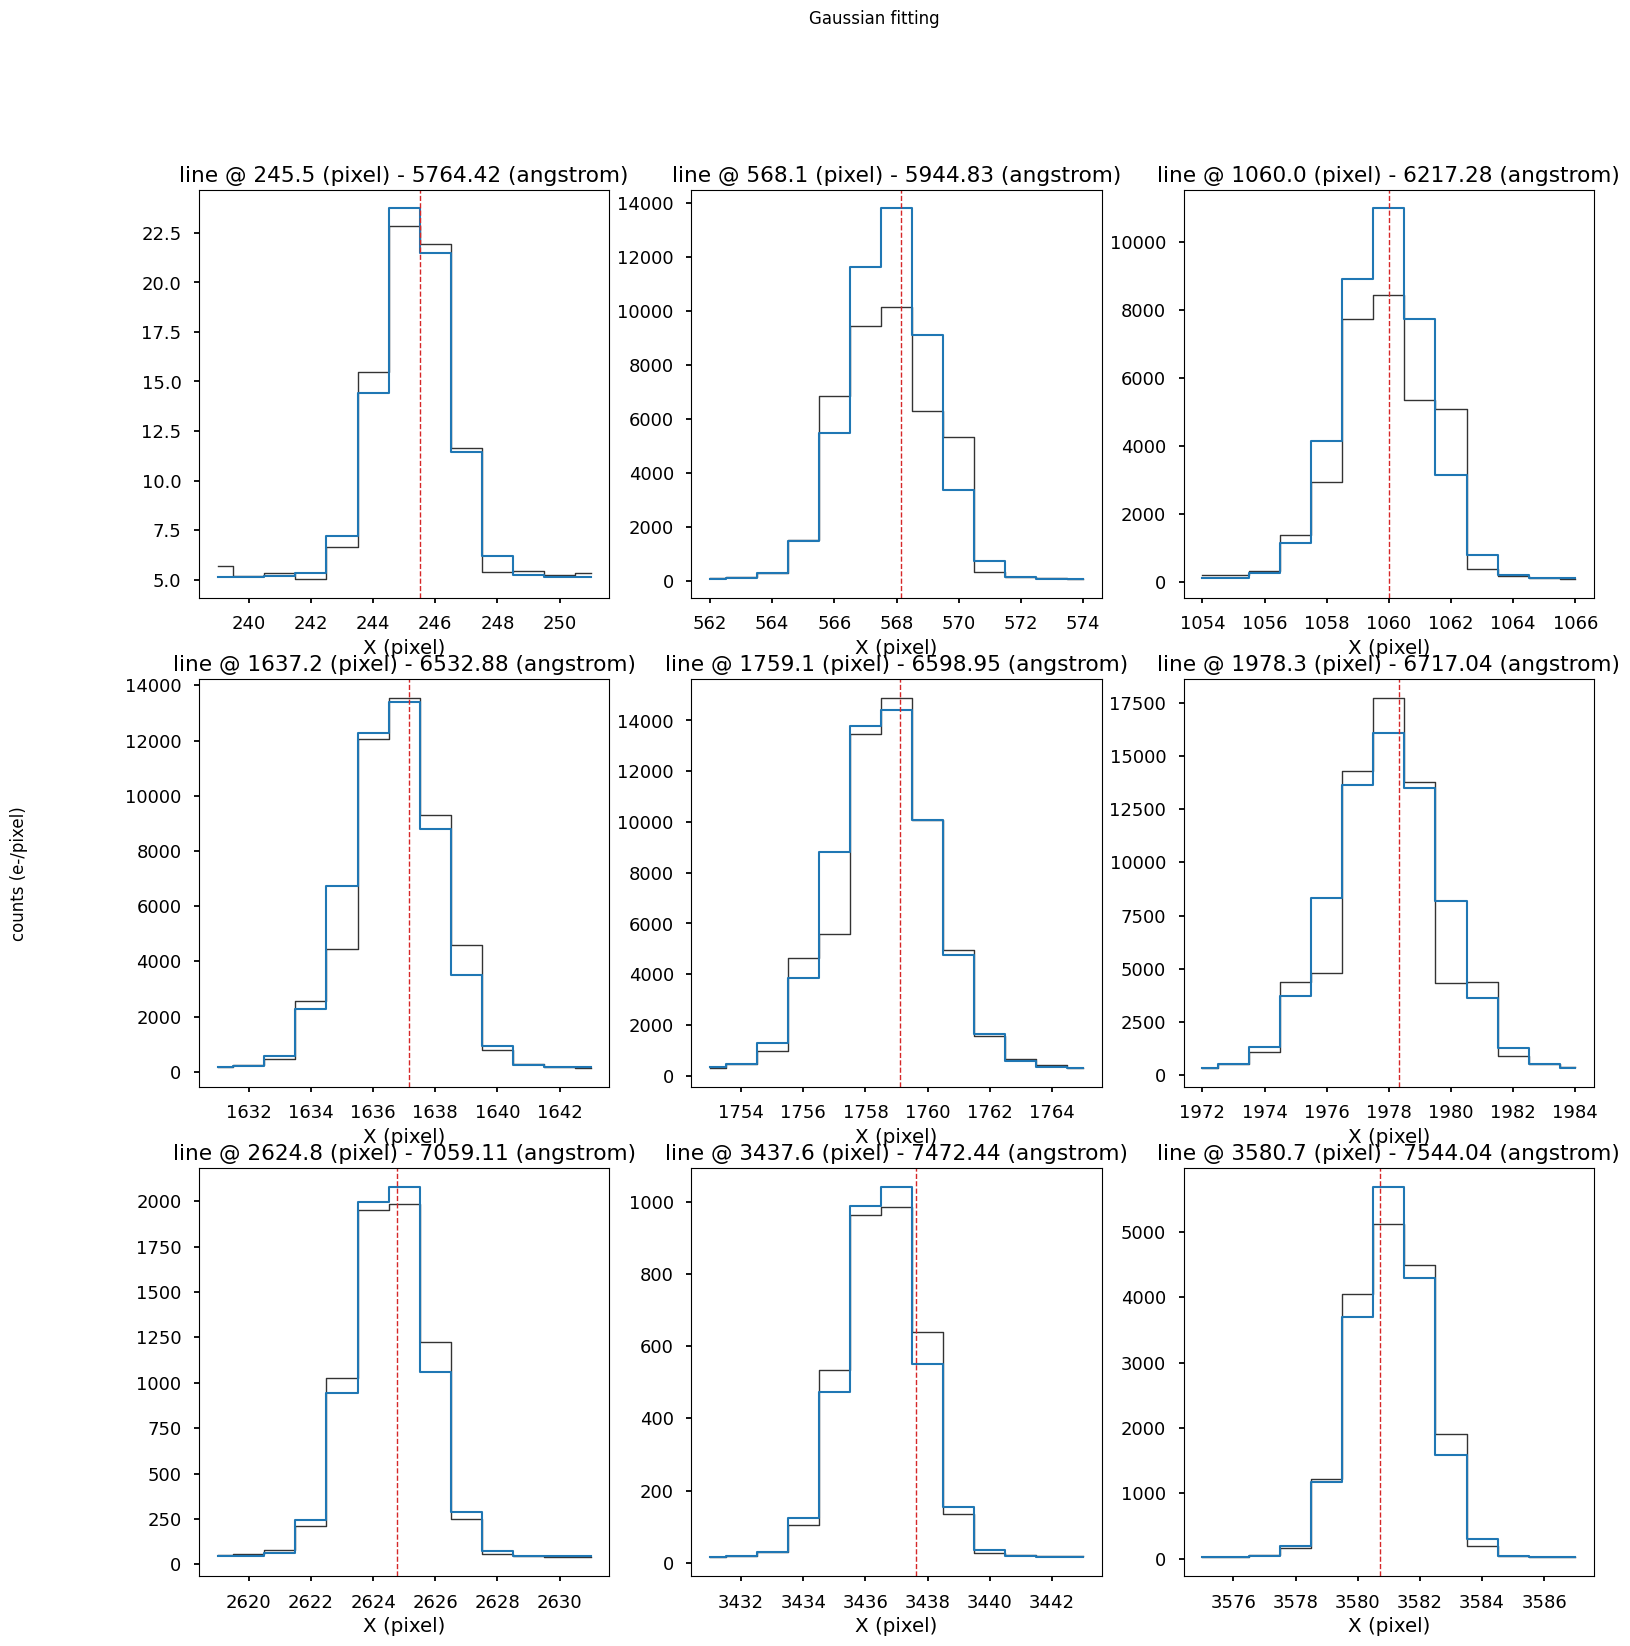

[INFO]: smoothing FWHM of guess lines along cross-dispersion axis using 2-deg polynomials
[INFO]: fitting wavelength solutions using 5-deg polynomials
[WARNING]: fiber 1 has all lines masked
[WARNING]: fiber 109 has all lines masked
[WARNING]: fiber 217 has all lines masked
[WARNING]: fiber 289 has all lines masked
[WARNING]: fiber 325 has all lines masked
[WARNING]: fiber 397 has all lines masked
[WARNING]: fiber 414 has all lines masked
[WARNING]: fiber 462 has all lines masked
[WARNING]: fiber 505 has all lines masked
[WARNING]: fiber 613 has all lines masked
[INFO]: finished wavelength fitting with median RMS = 0.0428764 AA (0.0811697 pix)
[INFO]: fitting LSF solutions using 2-deg polynomials
[INFO]: finished LSF fitting with median RMS = 0.144164 AA (0.2718 pix)


<Figure size 1040x715 with 0 Axes>

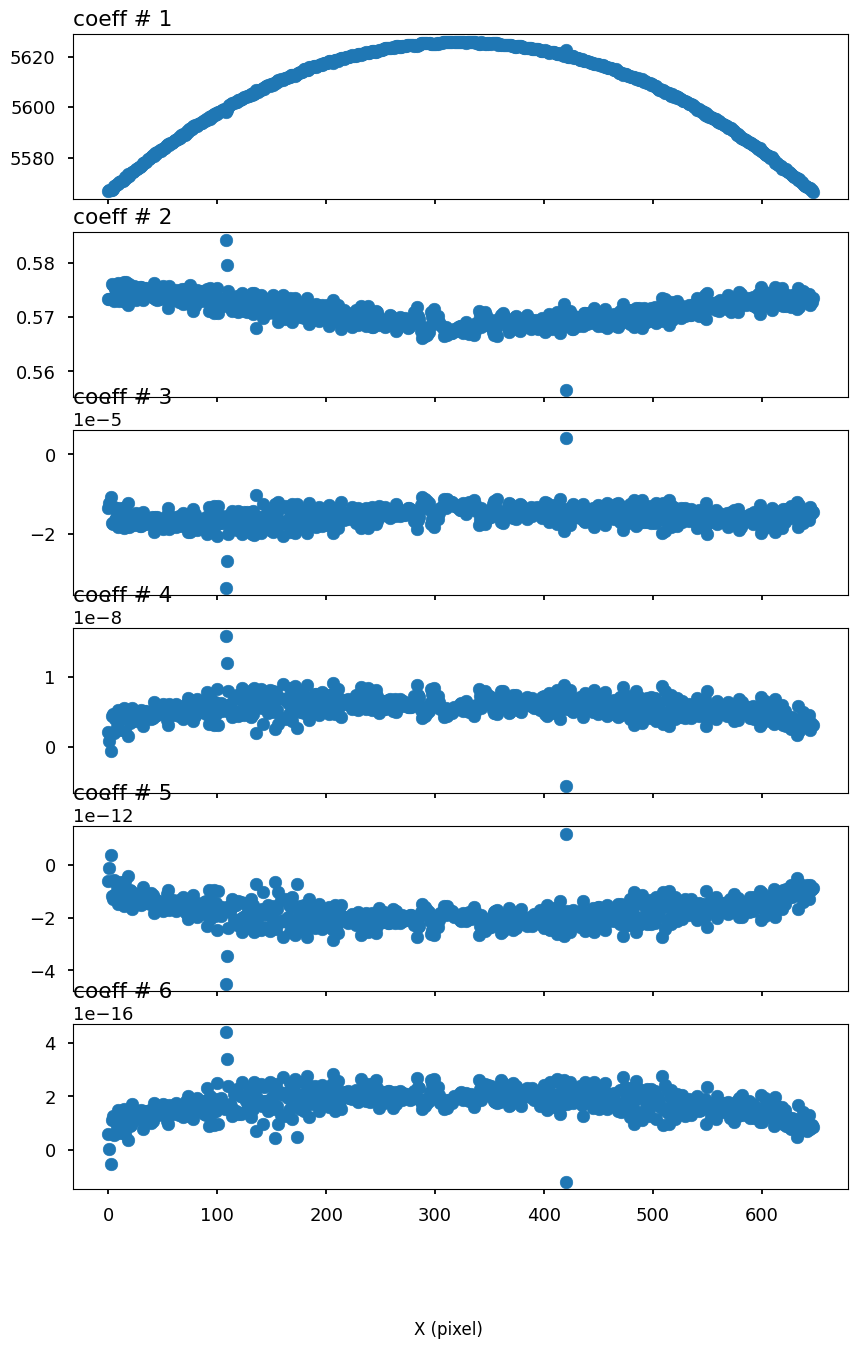

<Figure size 1040x715 with 0 Axes>

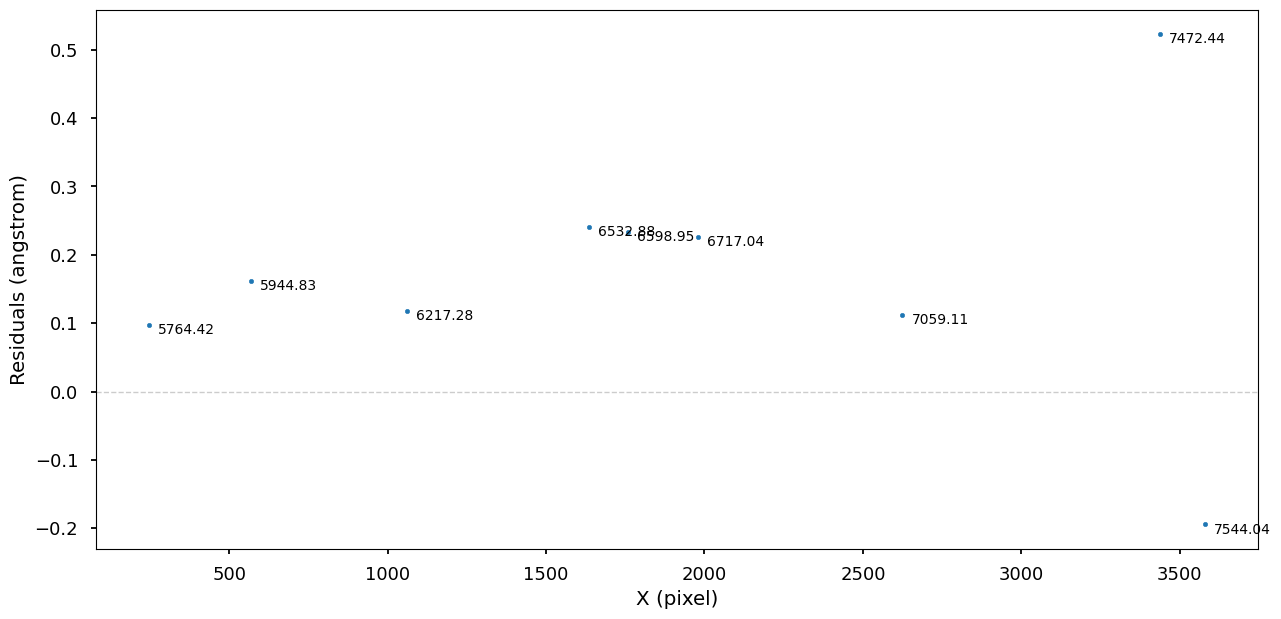

<Figure size 1040x715 with 0 Axes>

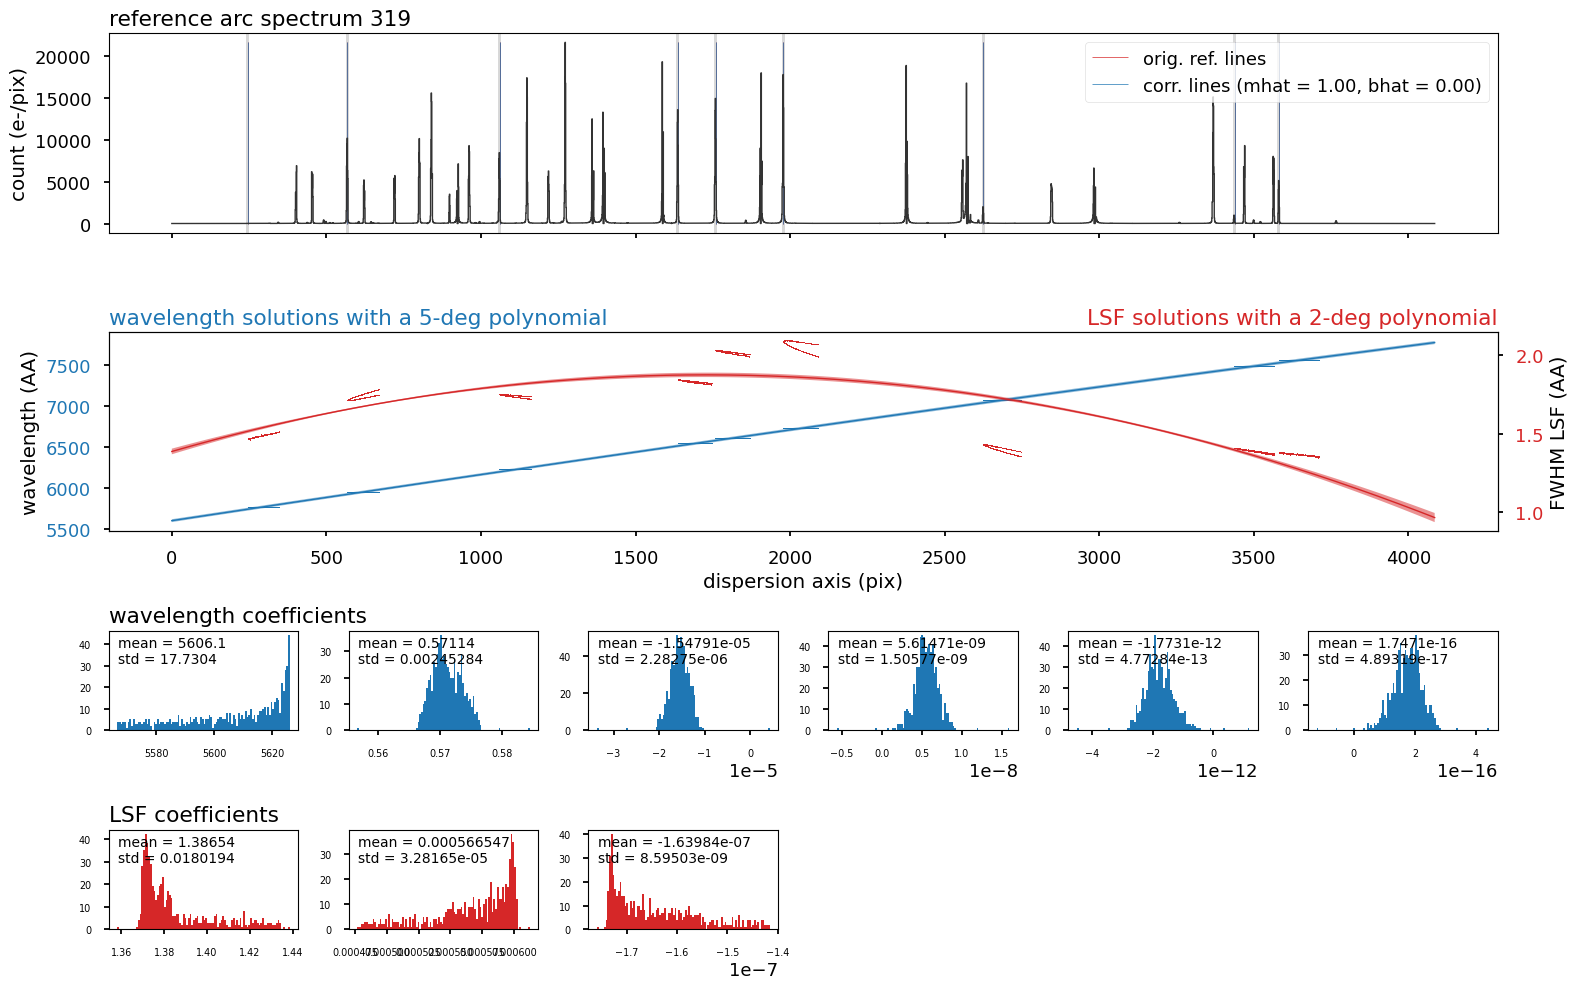

[INFO]: updating header and writing wavelength/LSF to '/home/mejia/Research/UNAM/lvm-drp/lvmdrp/examples/lco_com/data_calib/60177/lvm-mwave_neon-r1.fits' and '/home/mejia/Research/UNAM/lvm-drp/lvmdrp/examples/lco_com/data_calib/60177/lvm-mlsf_neon-r1.fits'
[INFO]: pixel-to-wavelength map in file '/home/mejia/Research/UNAM/lvm-drp/lvmdrp/python/lvmdrp/etc/wavelength/lvm-pixwav-neon_r2.txt'
[INFO]: going to use fiber 319 as reference
[INFO]: number of lines in file 34 percentage masked  67.6471 %
[INFO]: going to use 11 lines
[INFO]: reading arc from '/home/mejia/Research/UNAM/lvm-drp/lvmdrp/examples/data/lco_com/data.sdss5.org/sas/sdsswork/lvm/spectro/redux/0.1.1.dev0/1111/60177/calib/lvm-wmarc_neon-r2.fits'
[INFO]: loading reference lines for lamp = 'neon' in camera = 'r2'
[INFO]: pixel-to-wavelength map in file '/home/mejia/Research/UNAM/lvm-drp/lvmdrp/python/lvmdrp/etc/wavelength/lvm-pixwav-neon_r2.txt'
[INFO]: going to use fiber 319 as reference
[INFO]: number of lines in file 34 pe

<Figure size 1040x715 with 0 Axes>

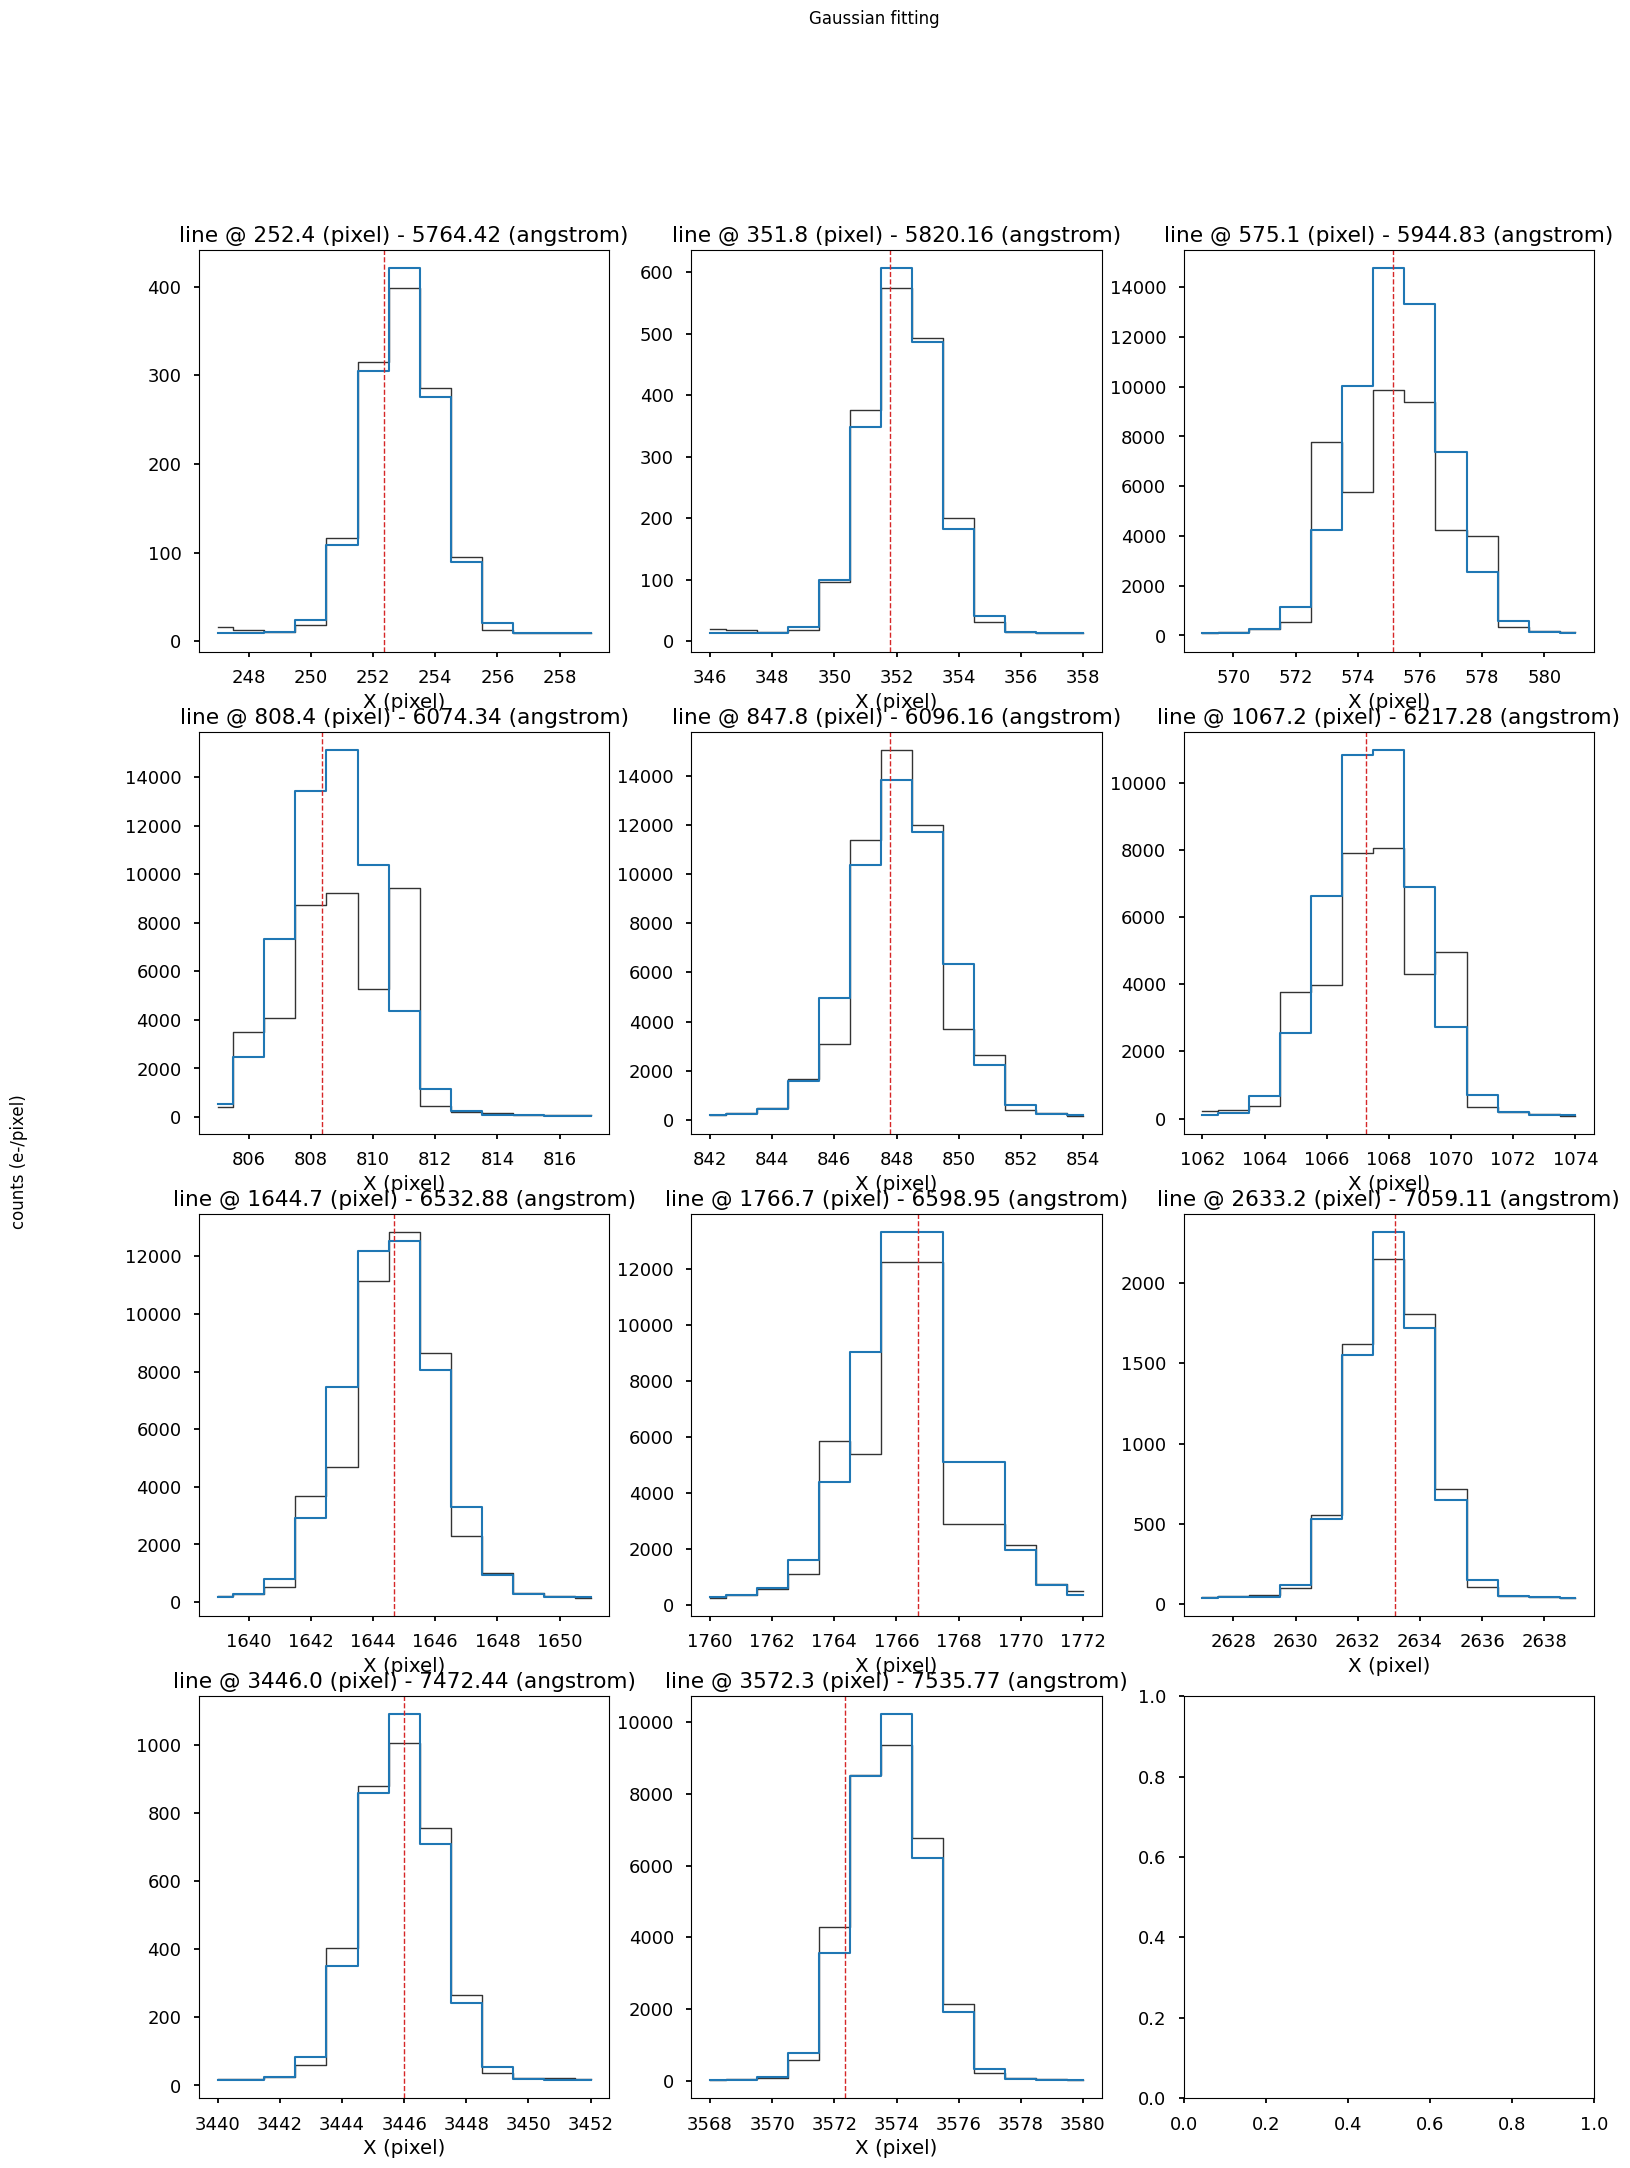

[INFO]: smoothing FWHM of guess lines along cross-dispersion axis using 2-deg polynomials
[INFO]: fitting wavelength solutions using 6-deg polynomials
[WARNING]: fiber 1 has all lines masked
[WARNING]: fiber 109 has all lines masked
[WARNING]: fiber 217 has all lines masked
[WARNING]: fiber 281 has all lines masked
[WARNING]: fiber 289 has all lines masked
[WARNING]: fiber 325 has all lines masked
[WARNING]: fiber 397 has all lines masked
[WARNING]: fiber 505 has all lines masked
[WARNING]: fiber 557 has all lines masked
[WARNING]: fiber 580 has all lines masked
[WARNING]: fiber 613 has all lines masked
[INFO]: finished wavelength fitting with median RMS = 0.0413403 AA (0.0786014 pix)
[INFO]: fitting LSF solutions using 2-deg polynomials
[INFO]: finished LSF fitting with median RMS = 0.136517 AA (0.257792 pix)


<Figure size 1040x715 with 0 Axes>

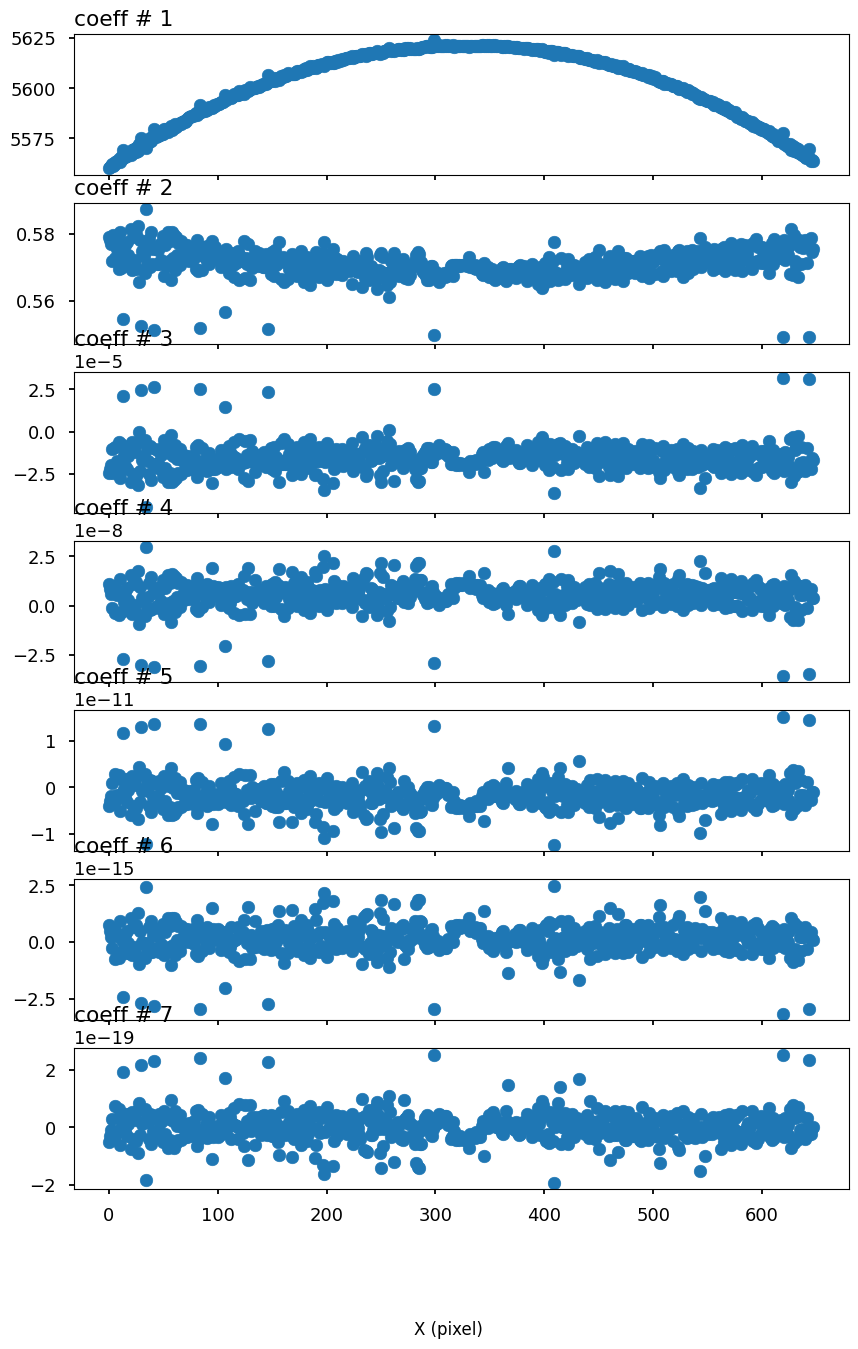

<Figure size 1040x715 with 0 Axes>

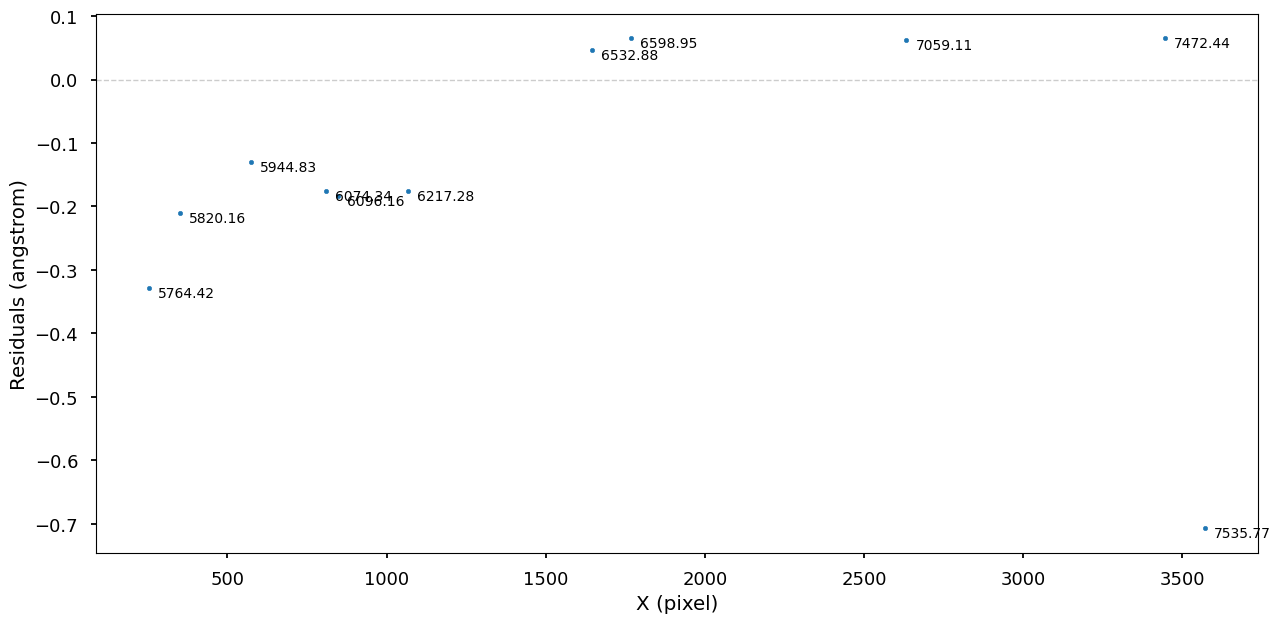

<Figure size 1040x715 with 0 Axes>

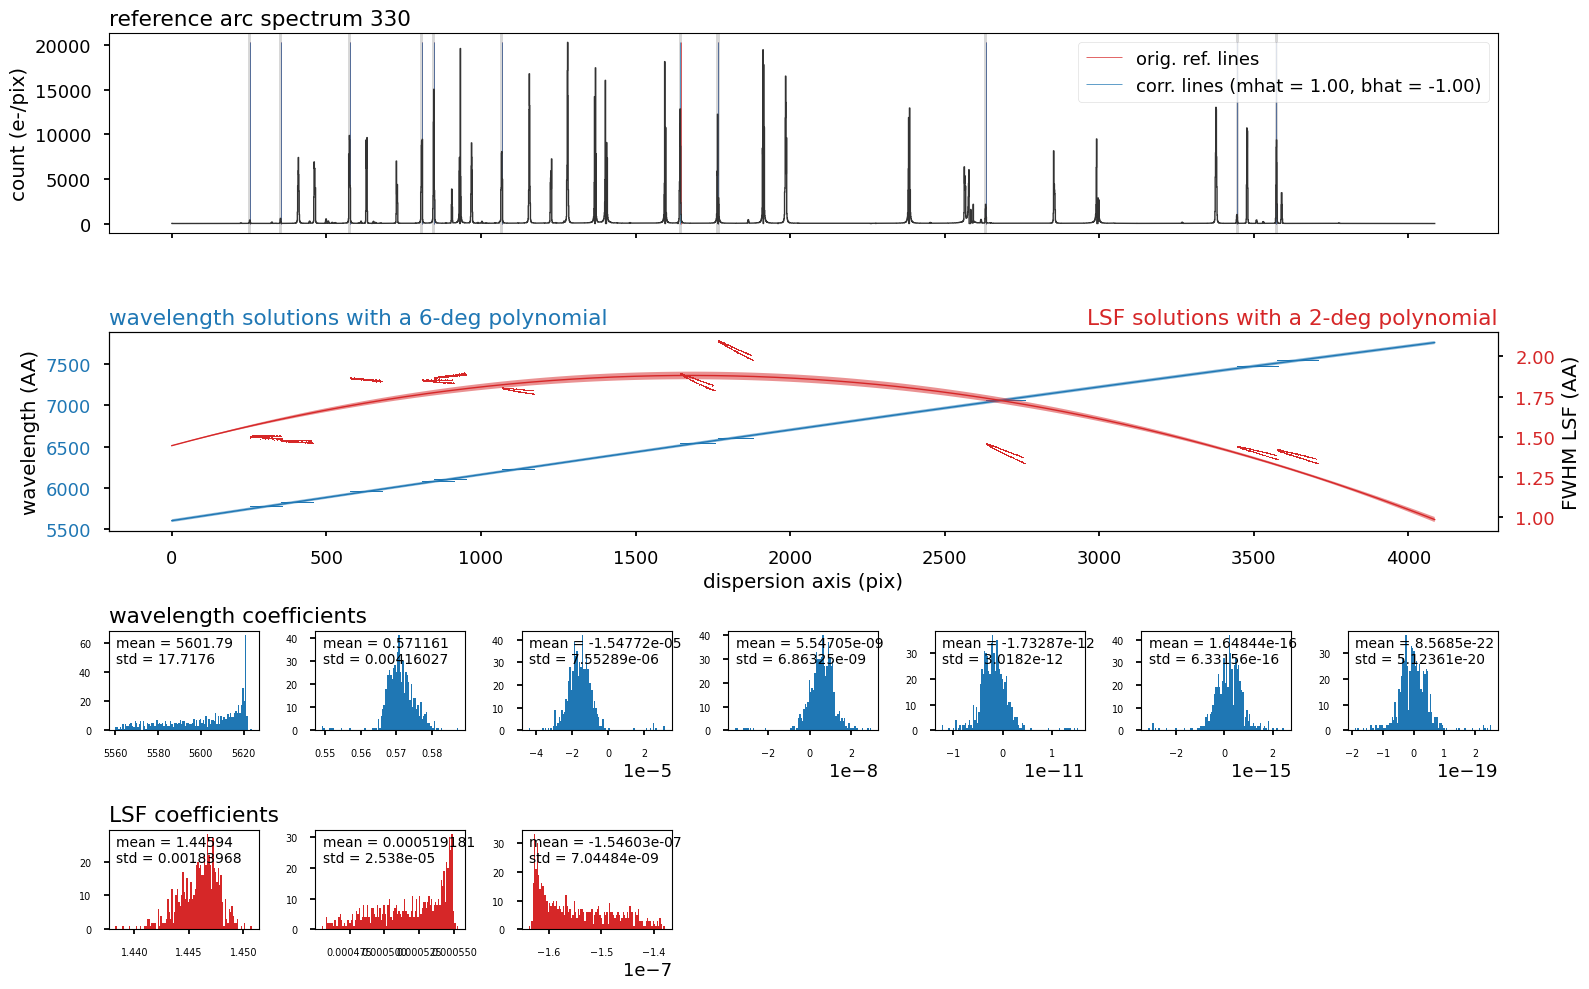

[INFO]: updating header and writing wavelength/LSF to '/home/mejia/Research/UNAM/lvm-drp/lvmdrp/examples/lco_com/data_calib/60177/lvm-mwave_neon-r2.fits' and '/home/mejia/Research/UNAM/lvm-drp/lvmdrp/examples/lco_com/data_calib/60177/lvm-mlsf_neon-r2.fits'
[INFO]: pixel-to-wavelength map in file '/home/mejia/Research/UNAM/lvm-drp/lvmdrp/python/lvmdrp/etc/wavelength/lvm-pixwav-neon_r3.txt'
[INFO]: going to use fiber 319 as reference
[INFO]: number of lines in file 34 percentage masked  82.3529 %
[INFO]: going to use 6 lines
[INFO]: reading arc from '/home/mejia/Research/UNAM/lvm-drp/lvmdrp/examples/data/lco_com/data.sdss5.org/sas/sdsswork/lvm/spectro/redux/0.1.1.dev0/1111/60177/calib/lvm-wmarc_neon-r3.fits'
[INFO]: loading reference lines for lamp = 'neon' in camera = 'r3'
[INFO]: pixel-to-wavelength map in file '/home/mejia/Research/UNAM/lvm-drp/lvmdrp/python/lvmdrp/etc/wavelength/lvm-pixwav-neon_r3.txt'
[INFO]: going to use fiber 319 as reference
[INFO]: number of lines in file 34 per

<Figure size 1040x715 with 0 Axes>

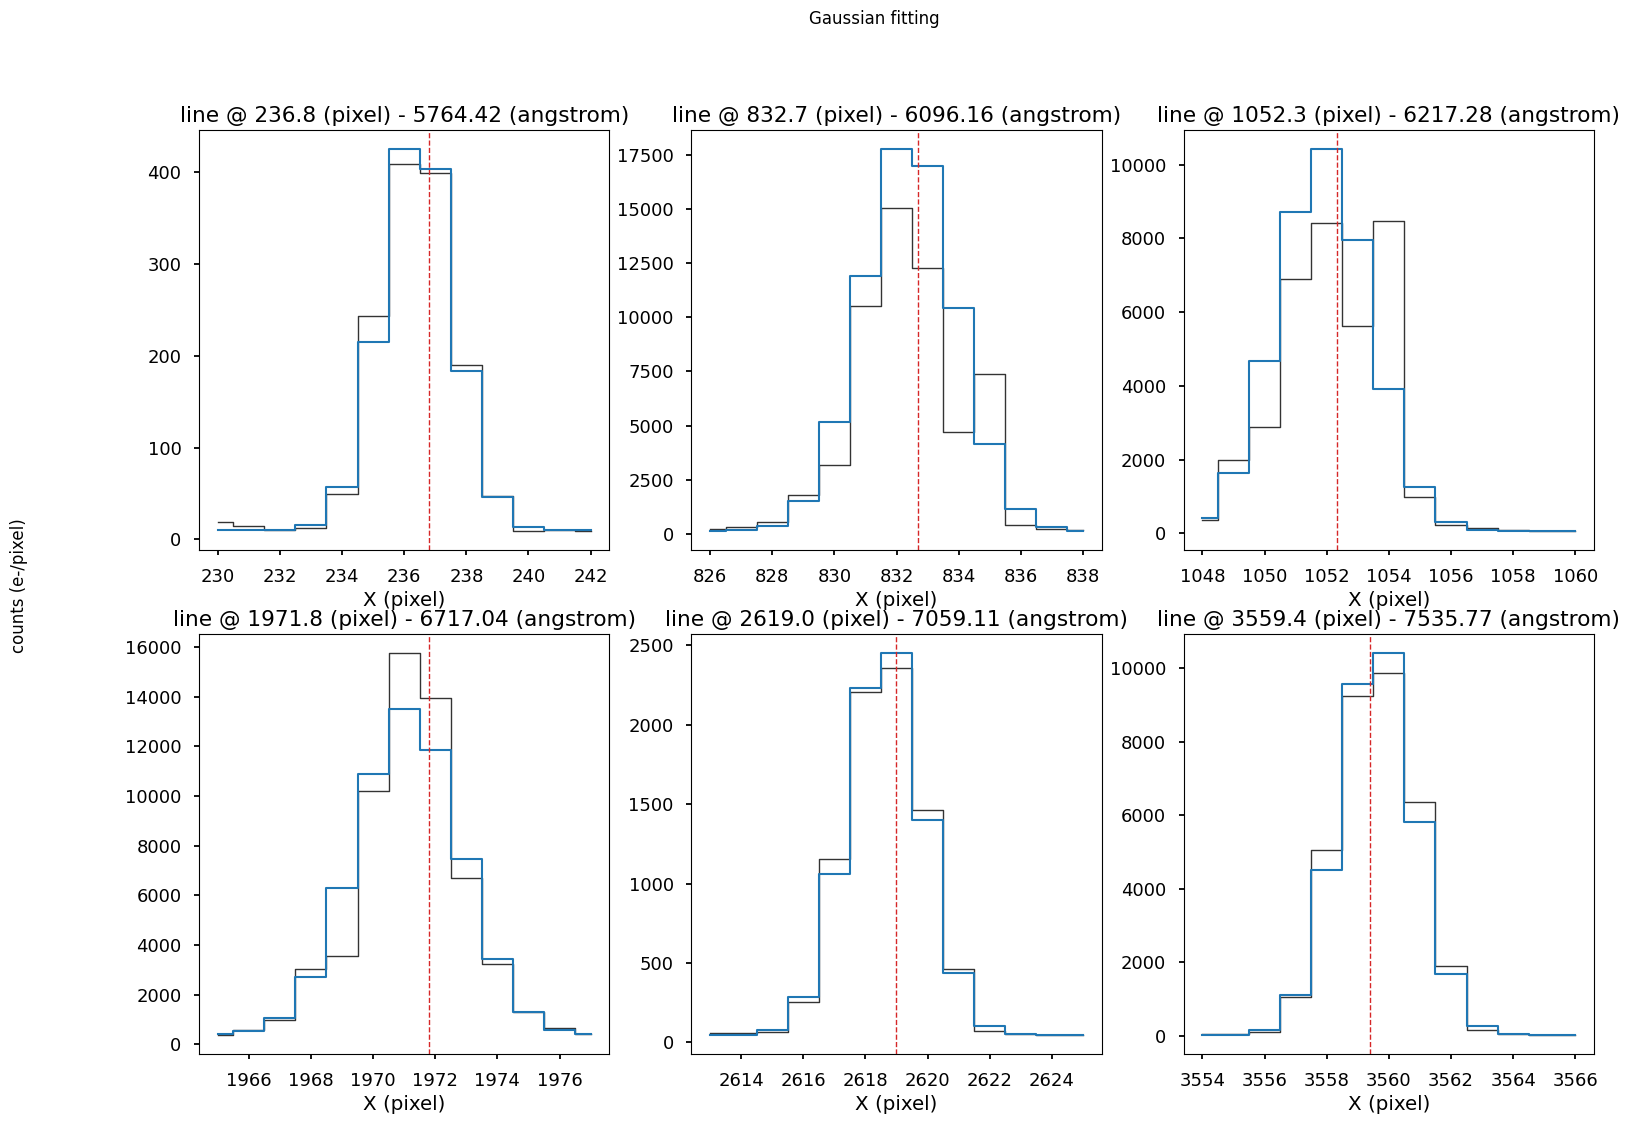

[INFO]: smoothing FWHM of guess lines along cross-dispersion axis using 2-deg polynomials
[INFO]: fitting wavelength solutions using 4-deg polynomials
[WARNING]: fiber 109 has all lines masked
[WARNING]: fiber 217 has all lines masked
[WARNING]: fiber 281 has all lines masked
[WARNING]: fiber 289 has all lines masked
[WARNING]: fiber 325 has all lines masked
[WARNING]: fiber 397 has all lines masked
[WARNING]: fiber 447 has all lines masked
[WARNING]: fiber 505 has all lines masked
[WARNING]: fiber 556 has all lines masked
[WARNING]: fiber 575 has all lines masked
[WARNING]: fiber 580 has all lines masked
[WARNING]: fiber 613 has all lines masked
[INFO]: finished wavelength fitting with median RMS = 0.0433361 AA (0.0827586 pix)
[INFO]: fitting LSF solutions using 2-deg polynomials
[INFO]: finished LSF fitting with median RMS = 0.173547 AA (0.325198 pix)


<Figure size 1040x715 with 0 Axes>

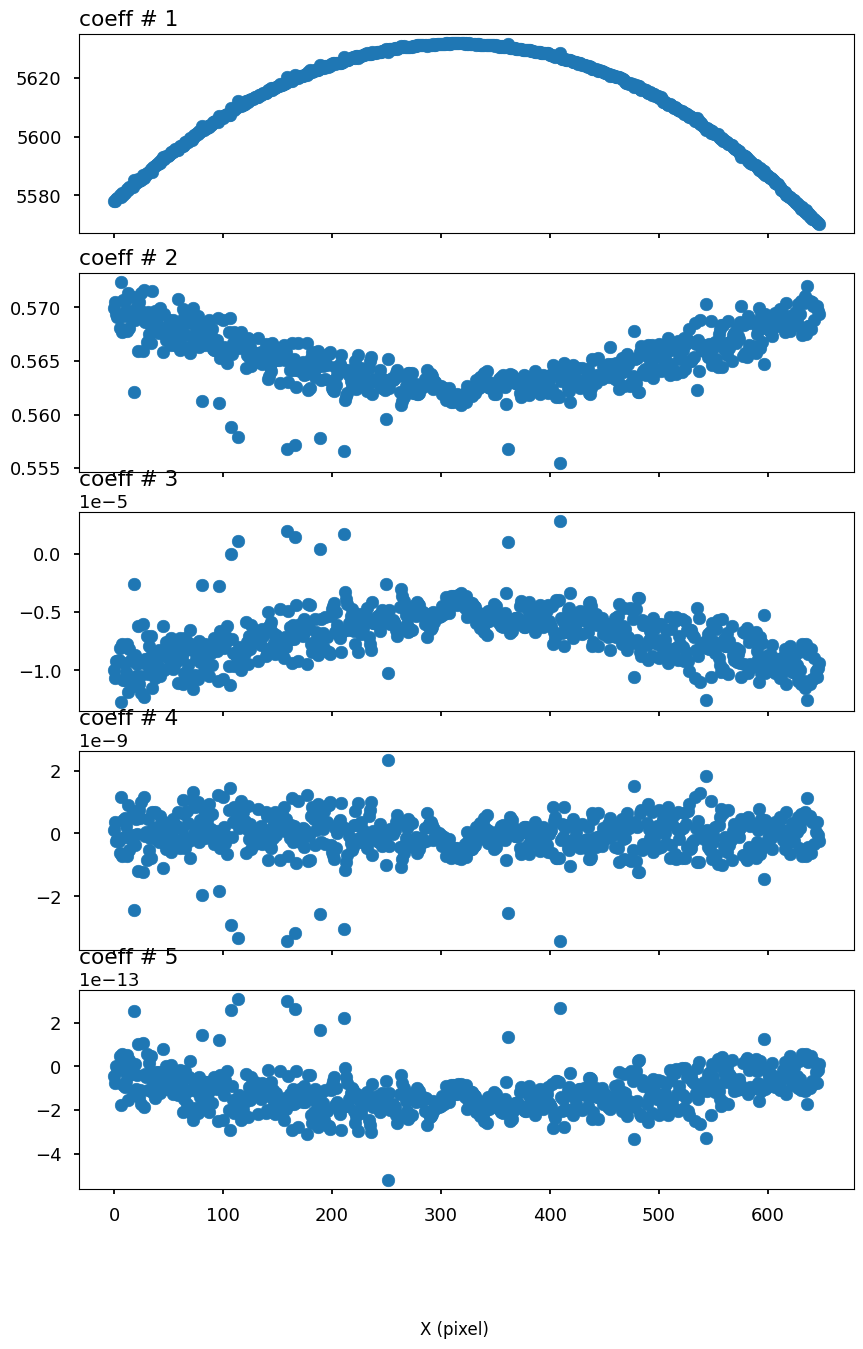

<Figure size 1040x715 with 0 Axes>

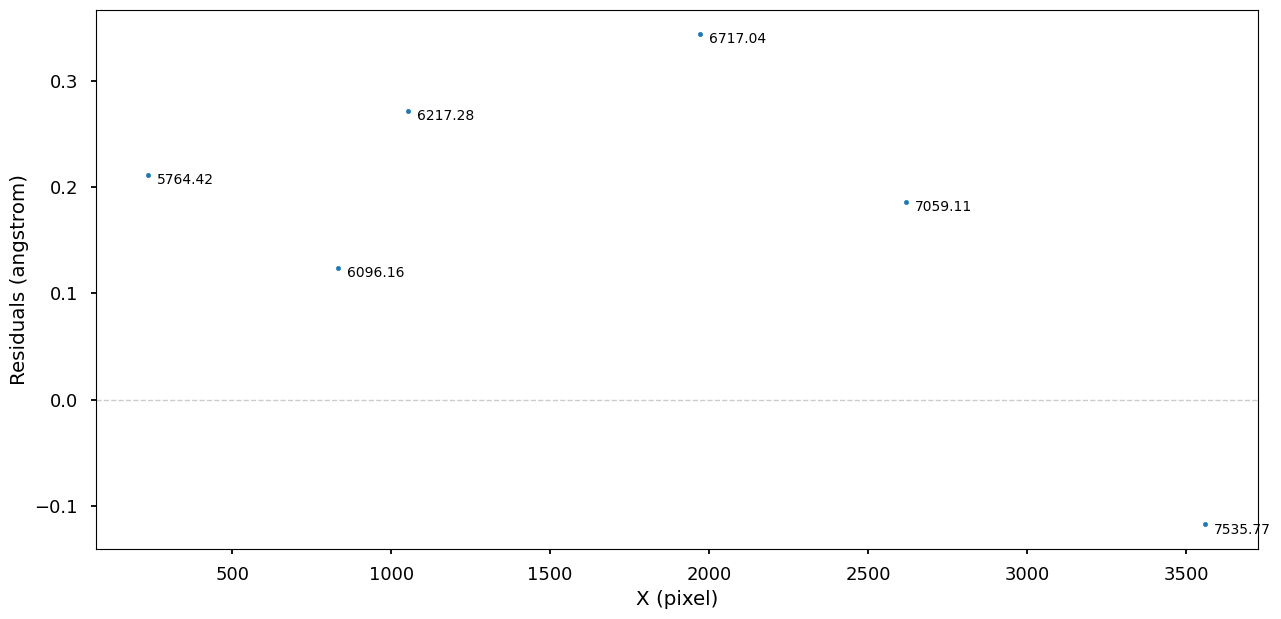

<Figure size 1040x715 with 0 Axes>

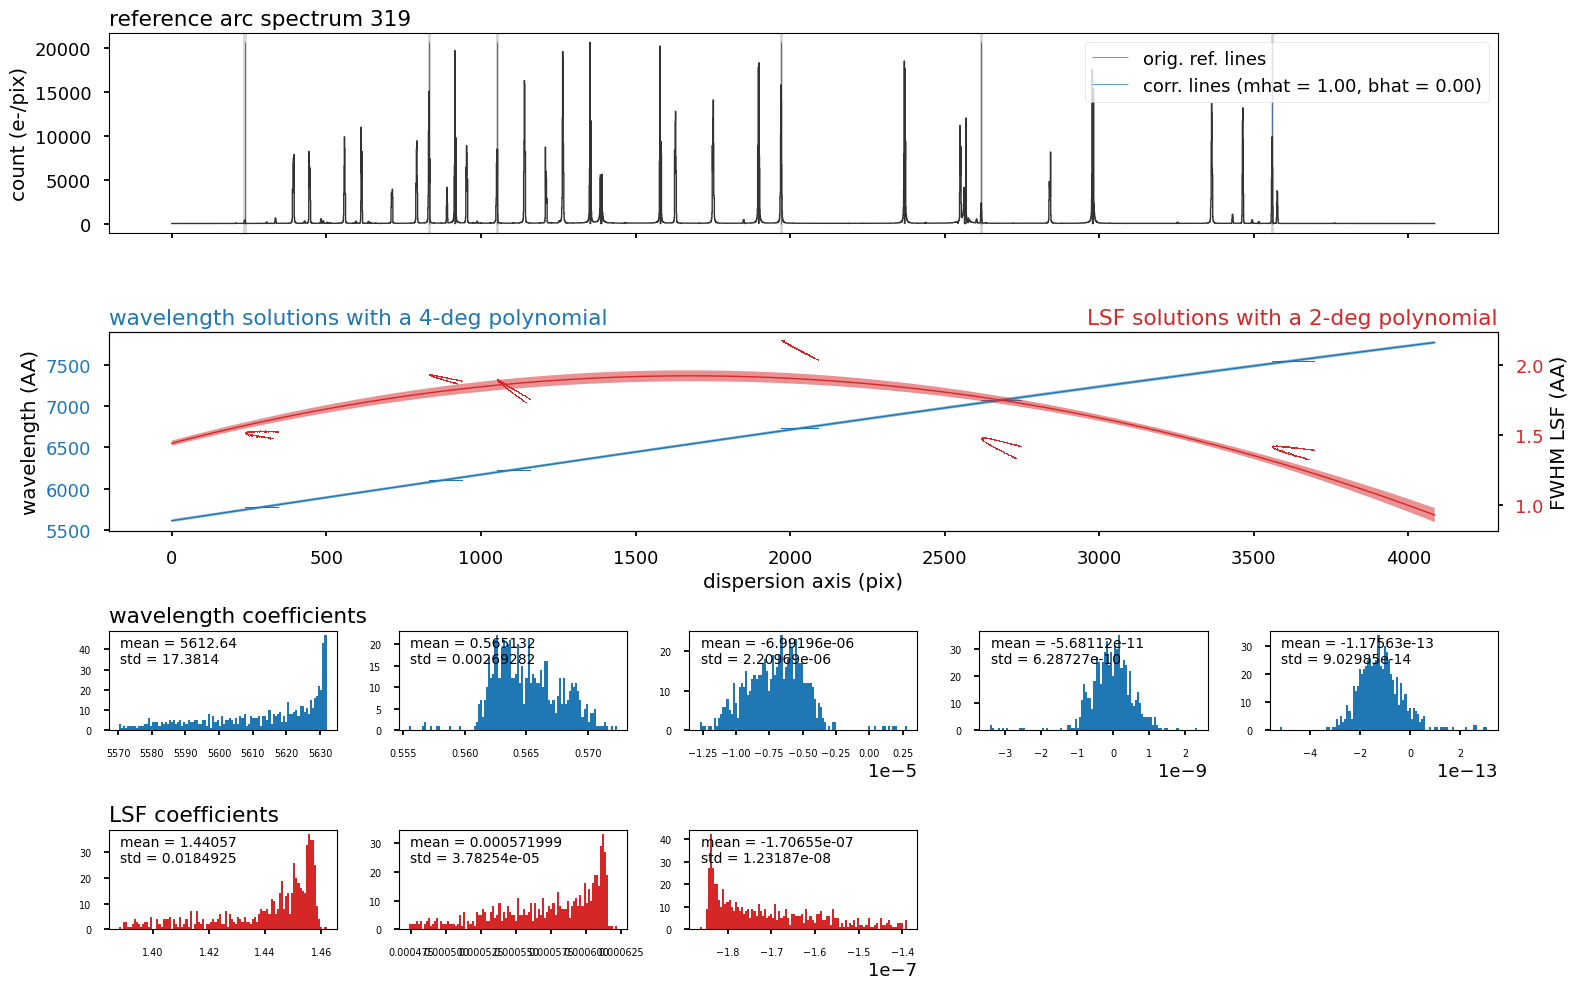

[INFO]: updating header and writing wavelength/LSF to '/home/mejia/Research/UNAM/lvm-drp/lvmdrp/examples/lco_com/data_calib/60177/lvm-mwave_neon-r3.fits' and '/home/mejia/Research/UNAM/lvm-drp/lvmdrp/examples/lco_com/data_calib/60177/lvm-mlsf_neon-r3.fits'
[INFO]: pixel-to-wavelength map in file '/home/mejia/Research/UNAM/lvm-drp/lvmdrp/python/lvmdrp/etc/wavelength/lvm-pixwav-neon_z1.txt'
[INFO]: going to use fiber 319 as reference
[INFO]: number of lines in file 31 percentage masked  58.0645 %
[INFO]: going to use 13 lines
[INFO]: reading arc from '/home/mejia/Research/UNAM/lvm-drp/lvmdrp/examples/data/lco_com/data.sdss5.org/sas/sdsswork/lvm/spectro/redux/0.1.1.dev0/1111/60177/calib/lvm-wmarc_neon-z1.fits'
[INFO]: loading reference lines for lamp = 'neon' in camera = 'z1'
[INFO]: pixel-to-wavelength map in file '/home/mejia/Research/UNAM/lvm-drp/lvmdrp/python/lvmdrp/etc/wavelength/lvm-pixwav-neon_z1.txt'
[INFO]: going to use fiber 319 as reference
[INFO]: number of lines in file 31 pe

<Figure size 1040x715 with 0 Axes>

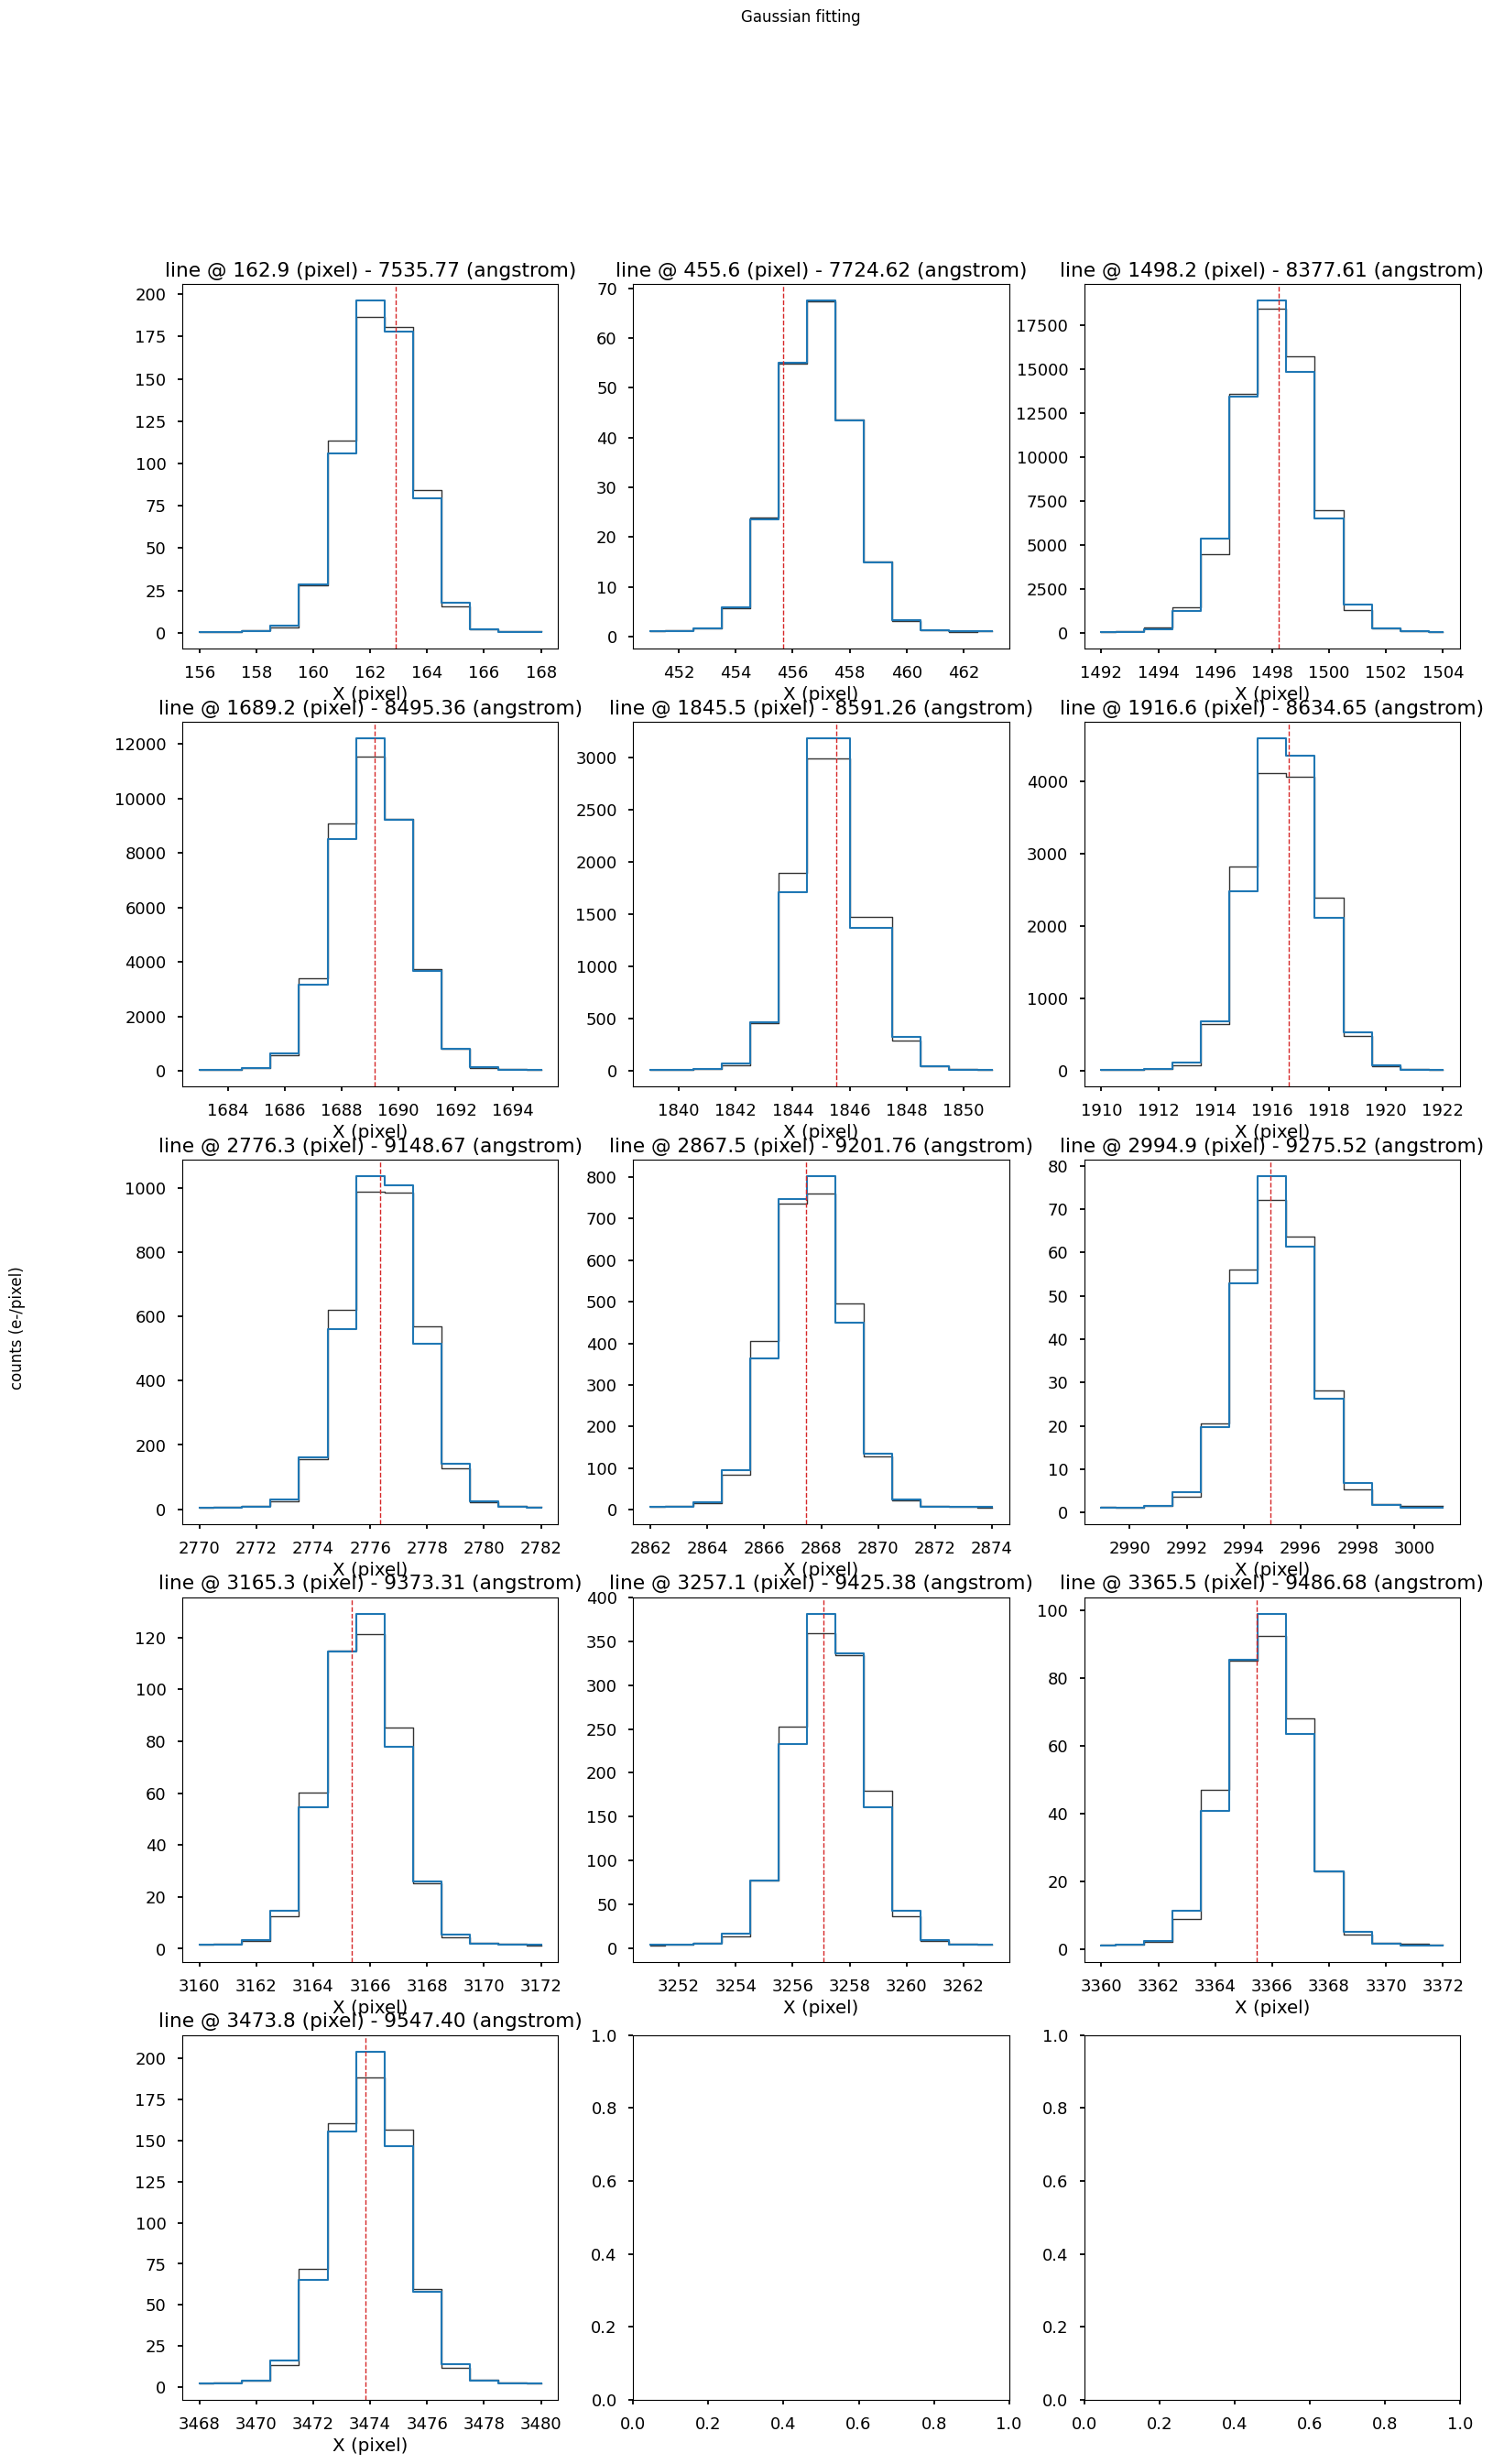

[INFO]: smoothing FWHM of guess lines along cross-dispersion axis using 2-deg polynomials
[INFO]: fitting wavelength solutions using 7-deg polynomials
[WARNING]: fiber 1 has all lines masked
[WARNING]: fiber 109 has all lines masked
[WARNING]: fiber 217 has all lines masked
[WARNING]: fiber 289 has all lines masked
[WARNING]: fiber 325 has all lines masked
[WARNING]: fiber 397 has all lines masked
[WARNING]: fiber 414 has all lines masked
[WARNING]: fiber 462 has all lines masked
[WARNING]: fiber 505 has all lines masked
[WARNING]: fiber 613 has all lines masked
[INFO]: finished wavelength fitting with median RMS = 0.00720909 AA (0.012023 pix)
[INFO]: fitting LSF solutions using 2-deg polynomials
[INFO]: finished LSF fitting with median RMS = 0.042214 AA (0.0705289 pix)


<Figure size 1040x715 with 0 Axes>

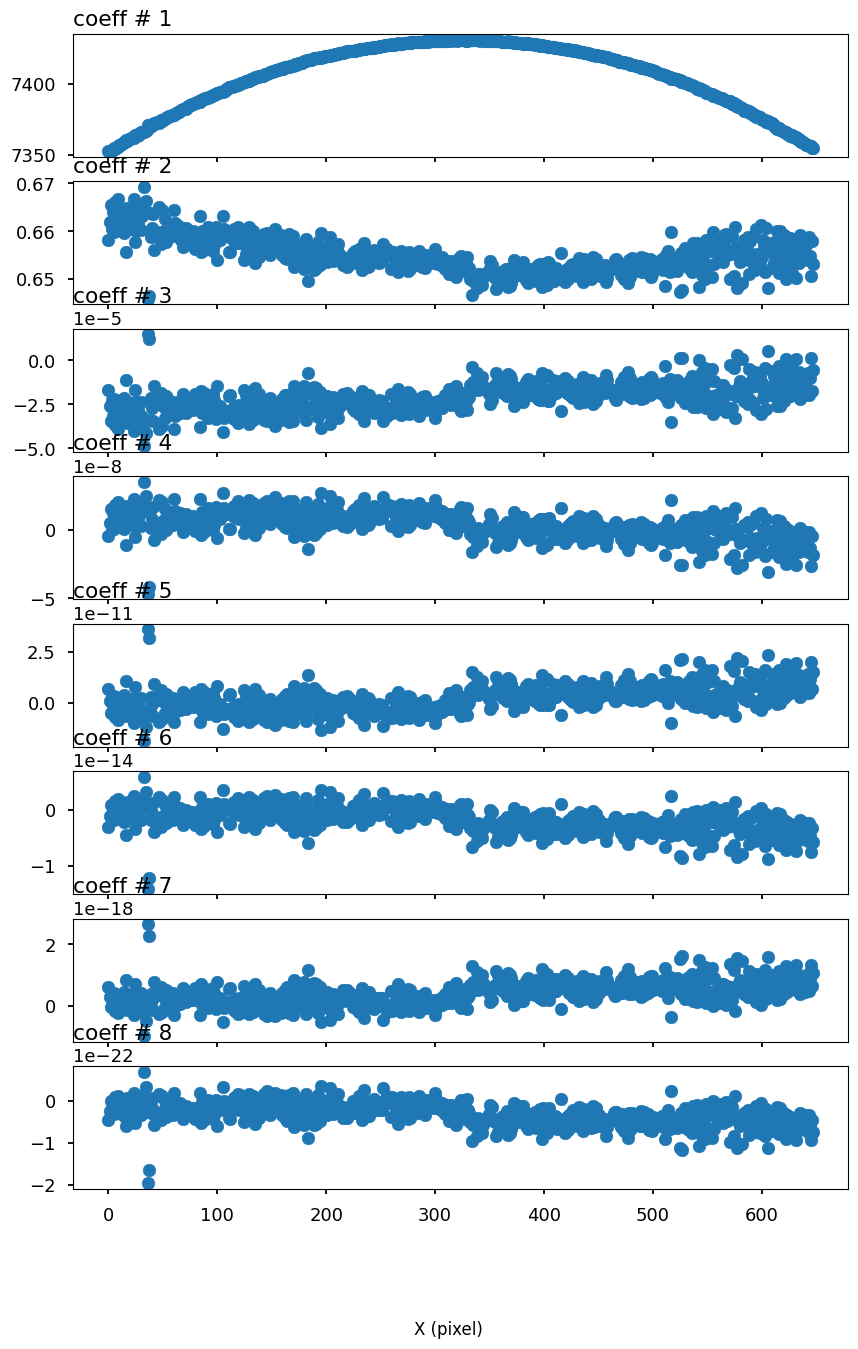

<Figure size 1040x715 with 0 Axes>

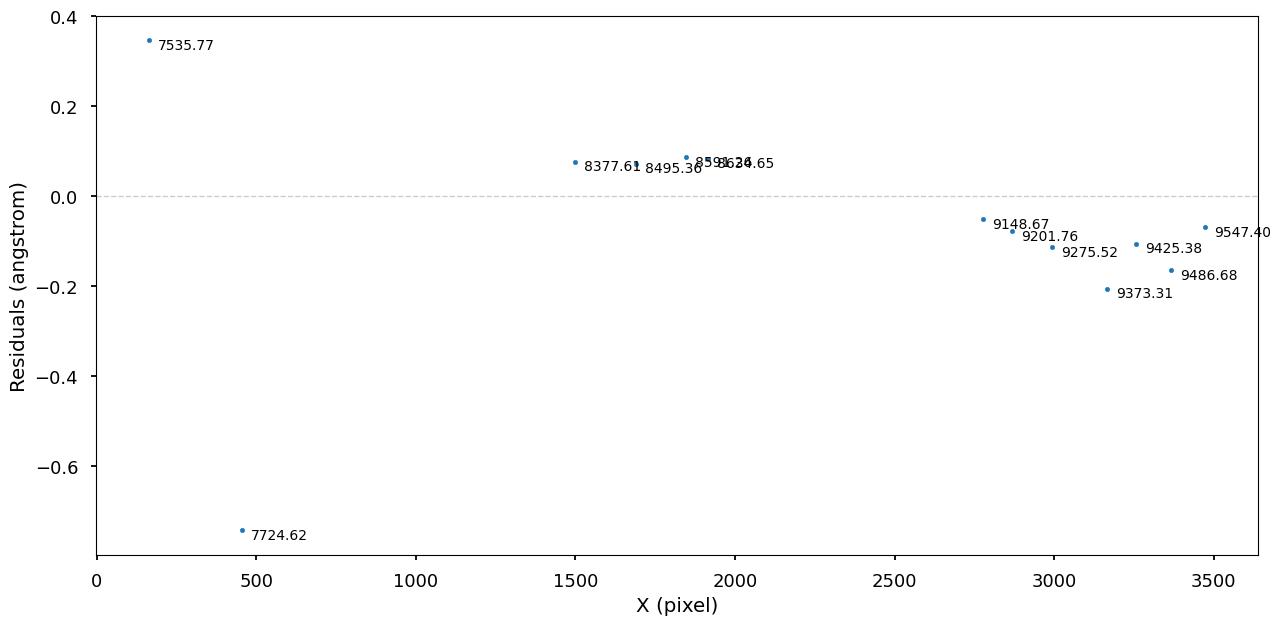

<Figure size 1040x715 with 0 Axes>

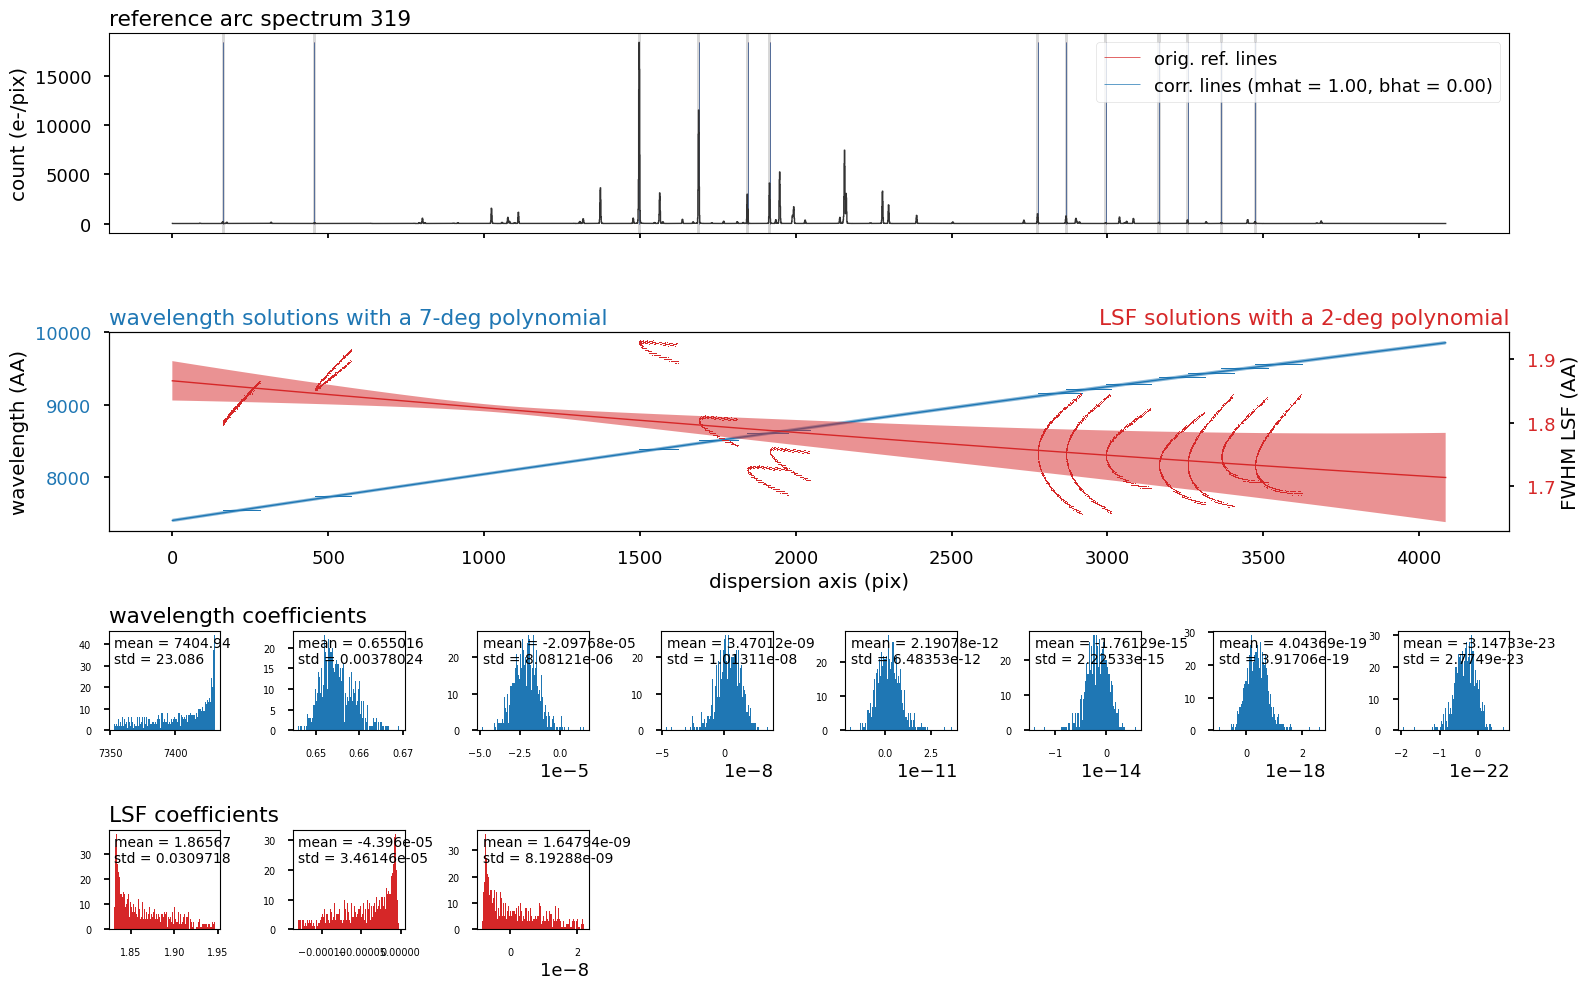

[INFO]: updating header and writing wavelength/LSF to '/home/mejia/Research/UNAM/lvm-drp/lvmdrp/examples/lco_com/data_calib/60177/lvm-mwave_neon-z1.fits' and '/home/mejia/Research/UNAM/lvm-drp/lvmdrp/examples/lco_com/data_calib/60177/lvm-mlsf_neon-z1.fits'
[INFO]: pixel-to-wavelength map in file '/home/mejia/Research/UNAM/lvm-drp/lvmdrp/python/lvmdrp/etc/wavelength/lvm-pixwav-neon_z2.txt'
[INFO]: going to use fiber 319 as reference
[INFO]: number of lines in file 31 percentage masked  58.0645 %
[INFO]: going to use 13 lines
[INFO]: reading arc from '/home/mejia/Research/UNAM/lvm-drp/lvmdrp/examples/data/lco_com/data.sdss5.org/sas/sdsswork/lvm/spectro/redux/0.1.1.dev0/1111/60177/calib/lvm-wmarc_neon-z2.fits'
[INFO]: loading reference lines for lamp = 'neon' in camera = 'z2'
[INFO]: pixel-to-wavelength map in file '/home/mejia/Research/UNAM/lvm-drp/lvmdrp/python/lvmdrp/etc/wavelength/lvm-pixwav-neon_z2.txt'
[INFO]: going to use fiber 319 as reference
[INFO]: number of lines in file 31 pe

<Figure size 1040x715 with 0 Axes>

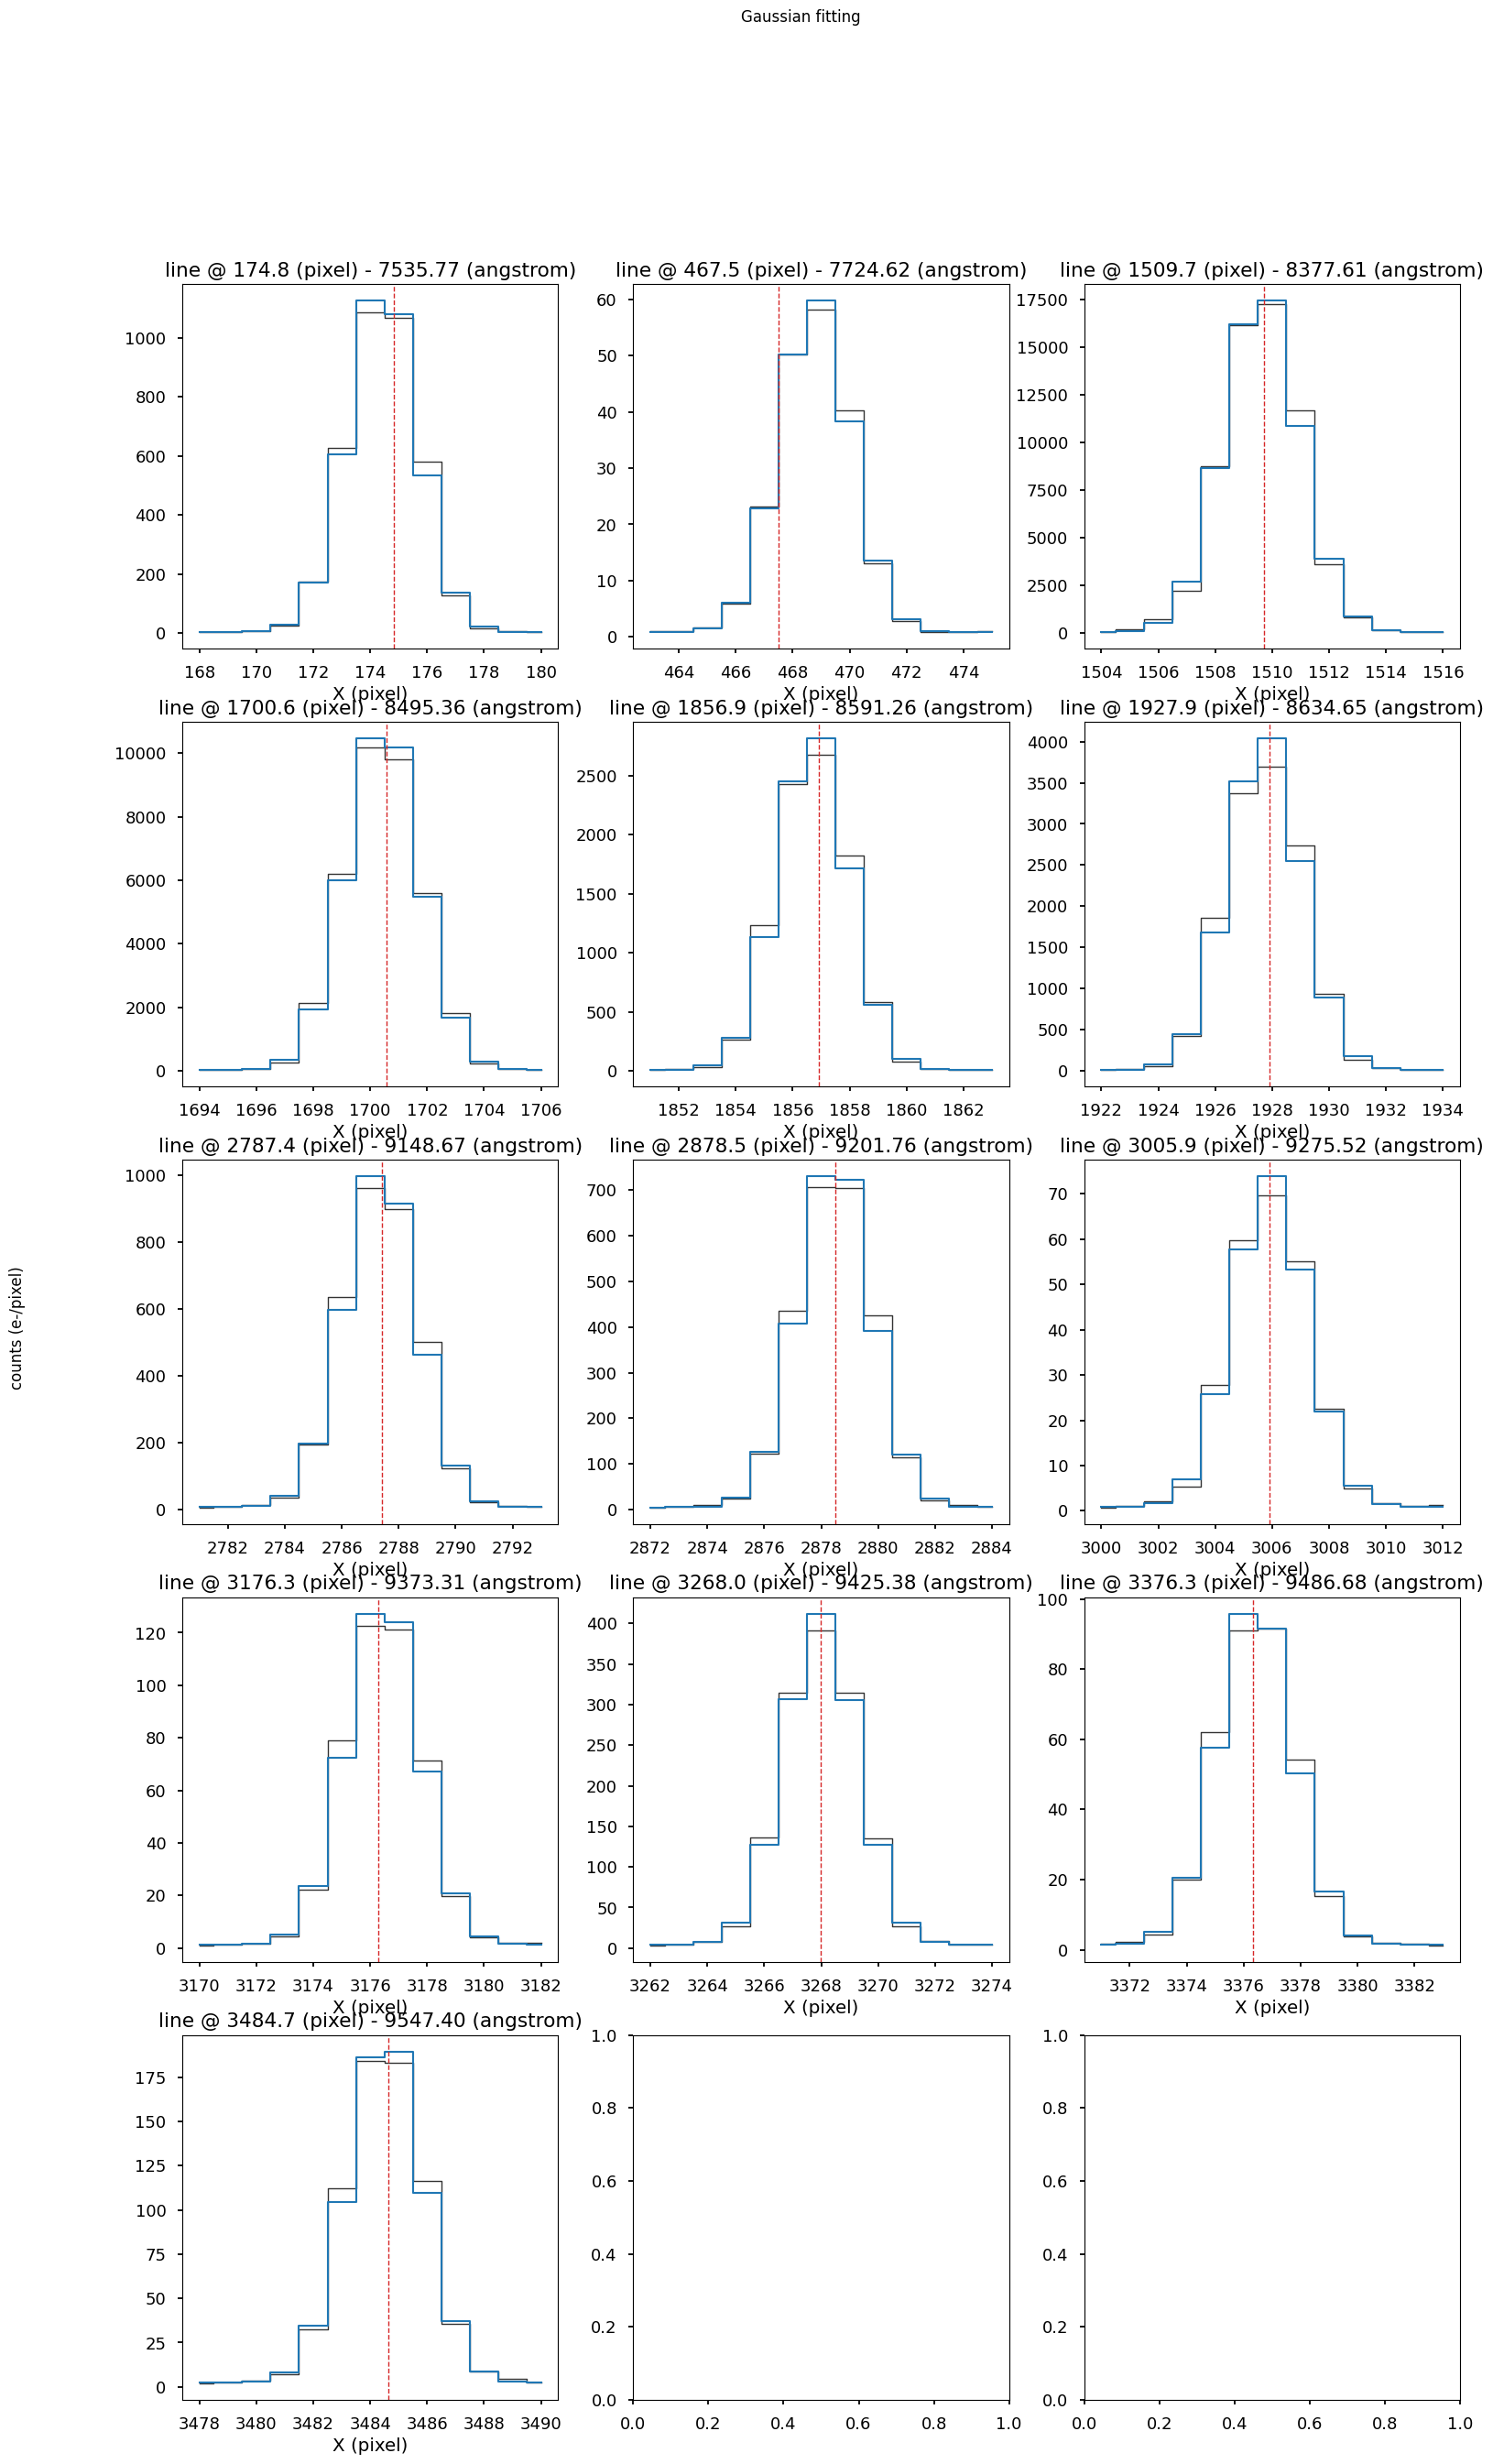

[INFO]: smoothing FWHM of guess lines along cross-dispersion axis using 2-deg polynomials
[INFO]: fitting wavelength solutions using 7-deg polynomials
[WARNING]: fiber 1 has all lines masked
[WARNING]: fiber 109 has all lines masked
[WARNING]: fiber 217 has all lines masked
[WARNING]: fiber 281 has all lines masked
[WARNING]: fiber 289 has all lines masked
[WARNING]: fiber 325 has all lines masked
[WARNING]: fiber 397 has all lines masked
[WARNING]: fiber 505 has all lines masked
[WARNING]: fiber 557 has all lines masked
[WARNING]: fiber 580 has all lines masked
[WARNING]: fiber 613 has all lines masked
[INFO]: finished wavelength fitting with median RMS = 0.00618895 AA (0.0102796 pix)
[INFO]: fitting LSF solutions using 2-deg polynomials
[INFO]: finished LSF fitting with median RMS = 0.0338378 AA (0.0559129 pix)


<Figure size 1040x715 with 0 Axes>

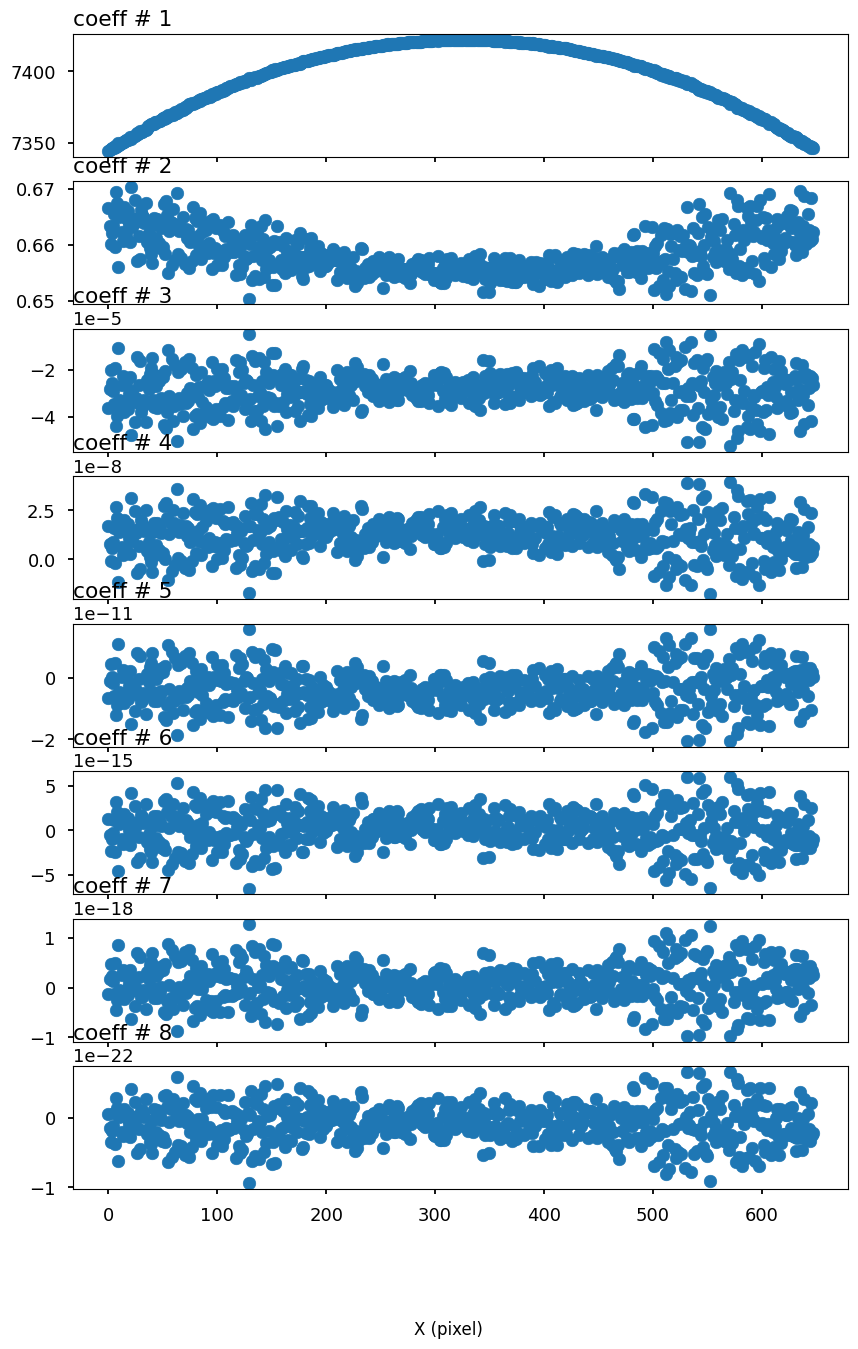

<Figure size 1040x715 with 0 Axes>

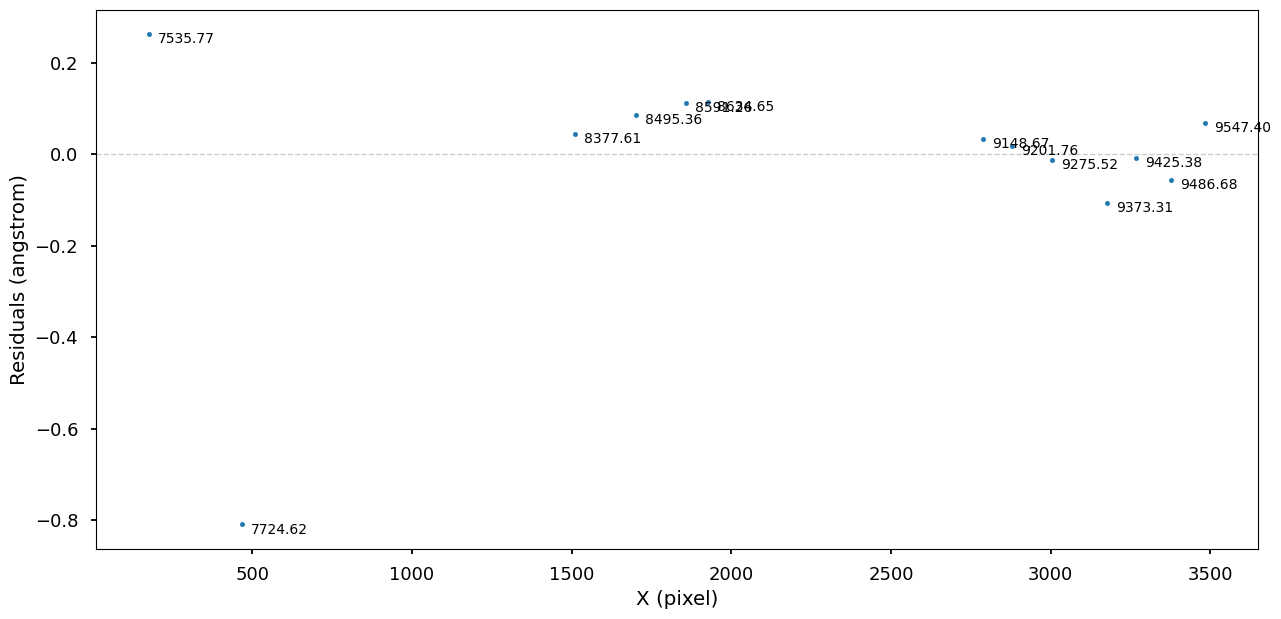

<Figure size 1040x715 with 0 Axes>

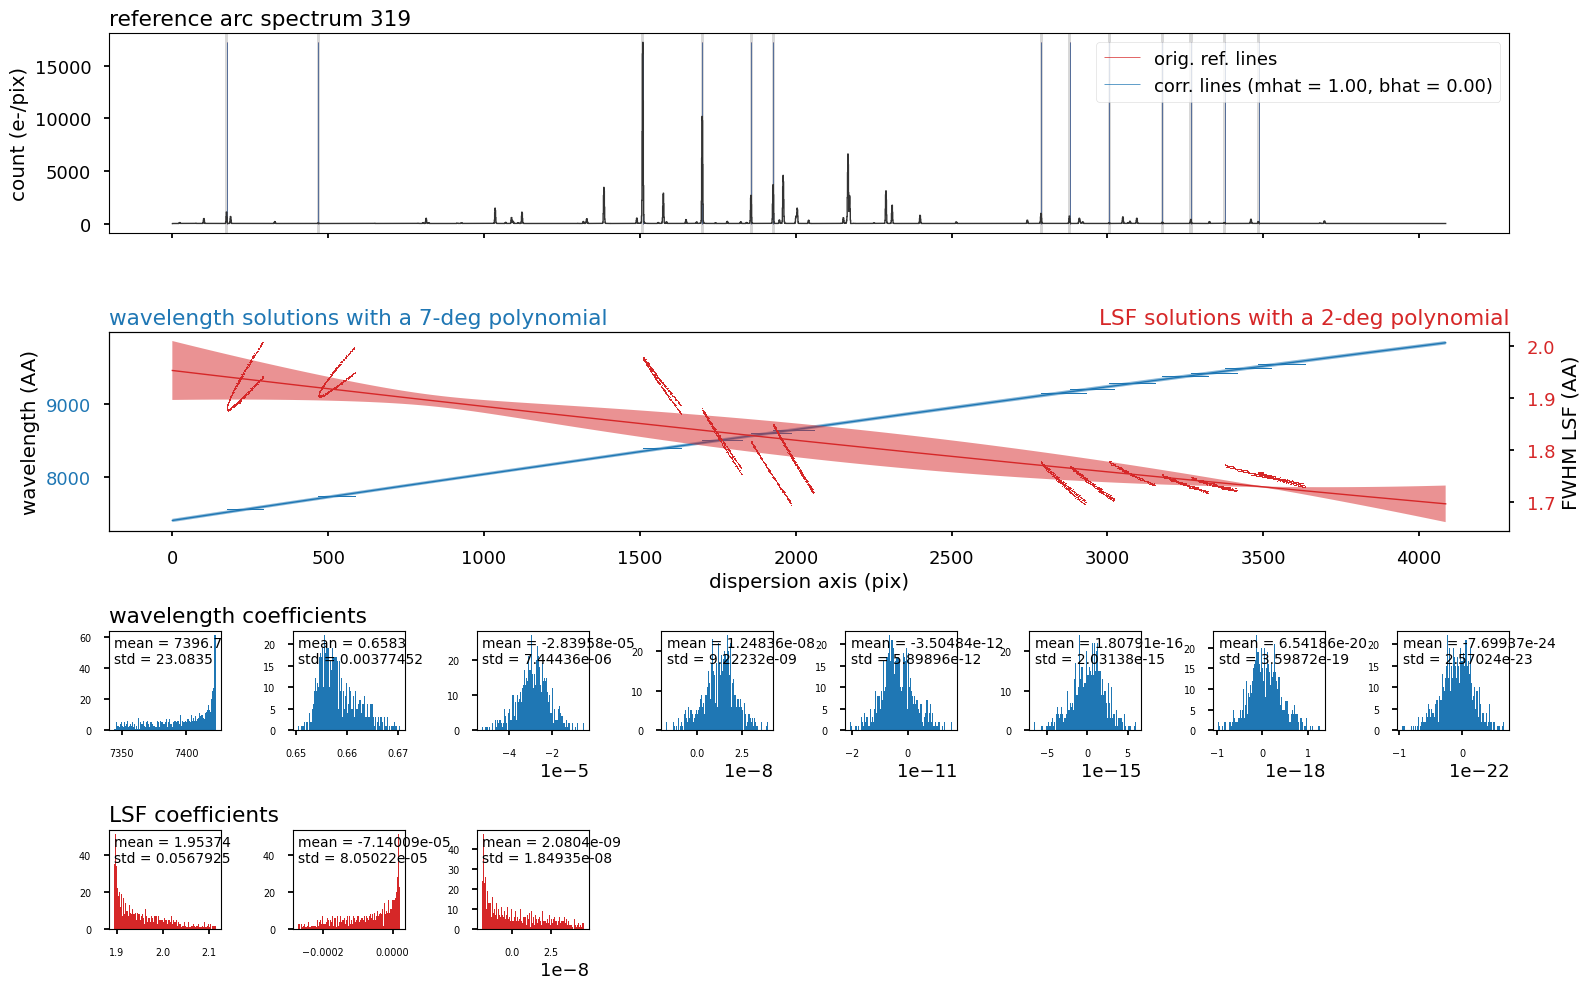

[INFO]: updating header and writing wavelength/LSF to '/home/mejia/Research/UNAM/lvm-drp/lvmdrp/examples/lco_com/data_calib/60177/lvm-mwave_neon-z2.fits' and '/home/mejia/Research/UNAM/lvm-drp/lvmdrp/examples/lco_com/data_calib/60177/lvm-mlsf_neon-z2.fits'
[INFO]: pixel-to-wavelength map in file '/home/mejia/Research/UNAM/lvm-drp/lvmdrp/python/lvmdrp/etc/wavelength/lvm-pixwav-neon_z3.txt'
[INFO]: going to use fiber 319 as reference
[INFO]: number of lines in file 31 percentage masked  58.0645 %
[INFO]: going to use 13 lines
[INFO]: reading arc from '/home/mejia/Research/UNAM/lvm-drp/lvmdrp/examples/data/lco_com/data.sdss5.org/sas/sdsswork/lvm/spectro/redux/0.1.1.dev0/1111/60177/calib/lvm-wmarc_neon-z3.fits'
[INFO]: loading reference lines for lamp = 'neon' in camera = 'z3'
[INFO]: pixel-to-wavelength map in file '/home/mejia/Research/UNAM/lvm-drp/lvmdrp/python/lvmdrp/etc/wavelength/lvm-pixwav-neon_z3.txt'
[INFO]: going to use fiber 319 as reference
[INFO]: number of lines in file 31 pe

<Figure size 1040x715 with 0 Axes>

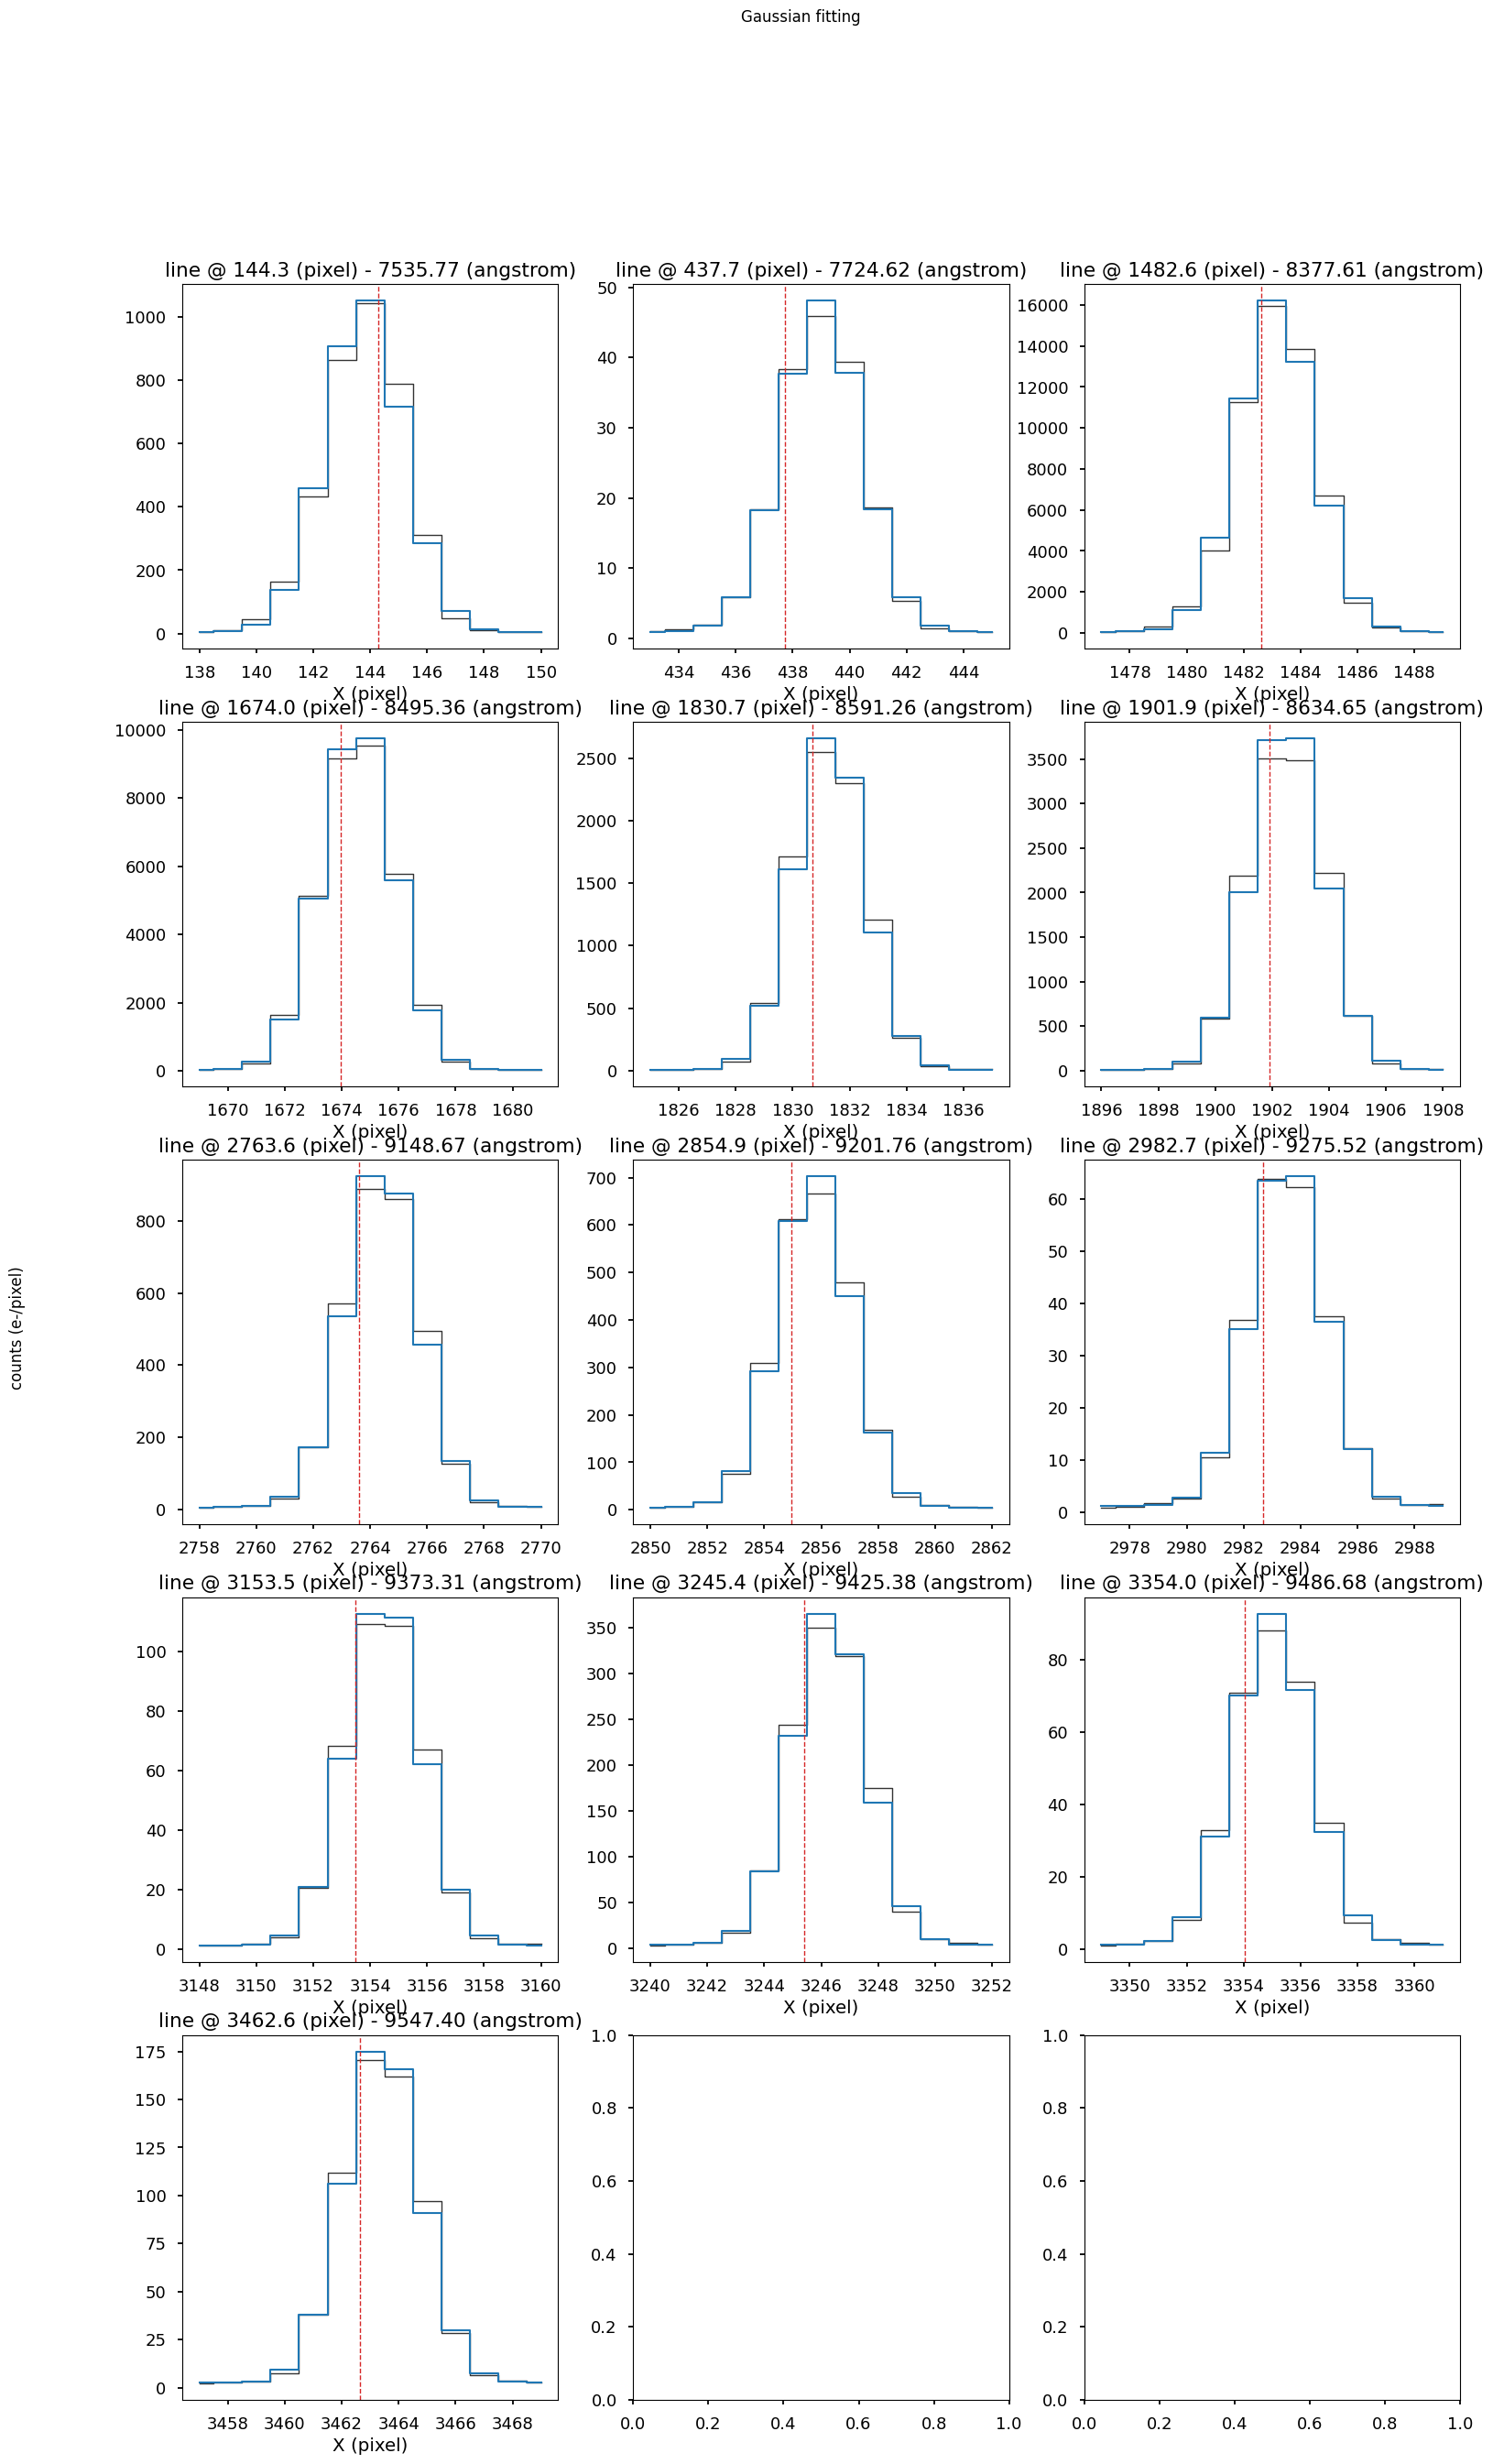

[INFO]: smoothing FWHM of guess lines along cross-dispersion axis using 2-deg polynomials
[INFO]: fitting wavelength solutions using 7-deg polynomials
[WARNING]: fiber 109 has all lines masked
[WARNING]: fiber 217 has all lines masked
[WARNING]: fiber 281 has all lines masked
[WARNING]: fiber 289 has all lines masked
[WARNING]: fiber 325 has all lines masked
[WARNING]: fiber 397 has all lines masked
[WARNING]: fiber 447 has all lines masked
[WARNING]: fiber 505 has all lines masked
[WARNING]: fiber 556 has all lines masked
[WARNING]: fiber 575 has all lines masked
[WARNING]: fiber 580 has all lines masked
[WARNING]: fiber 613 has all lines masked
[INFO]: finished wavelength fitting with median RMS = 0.00635098 AA (0.0106222 pix)
[INFO]: fitting LSF solutions using 2-deg polynomials
[INFO]: finished LSF fitting with median RMS = 0.0317136 AA (0.0536662 pix)


<Figure size 1040x715 with 0 Axes>

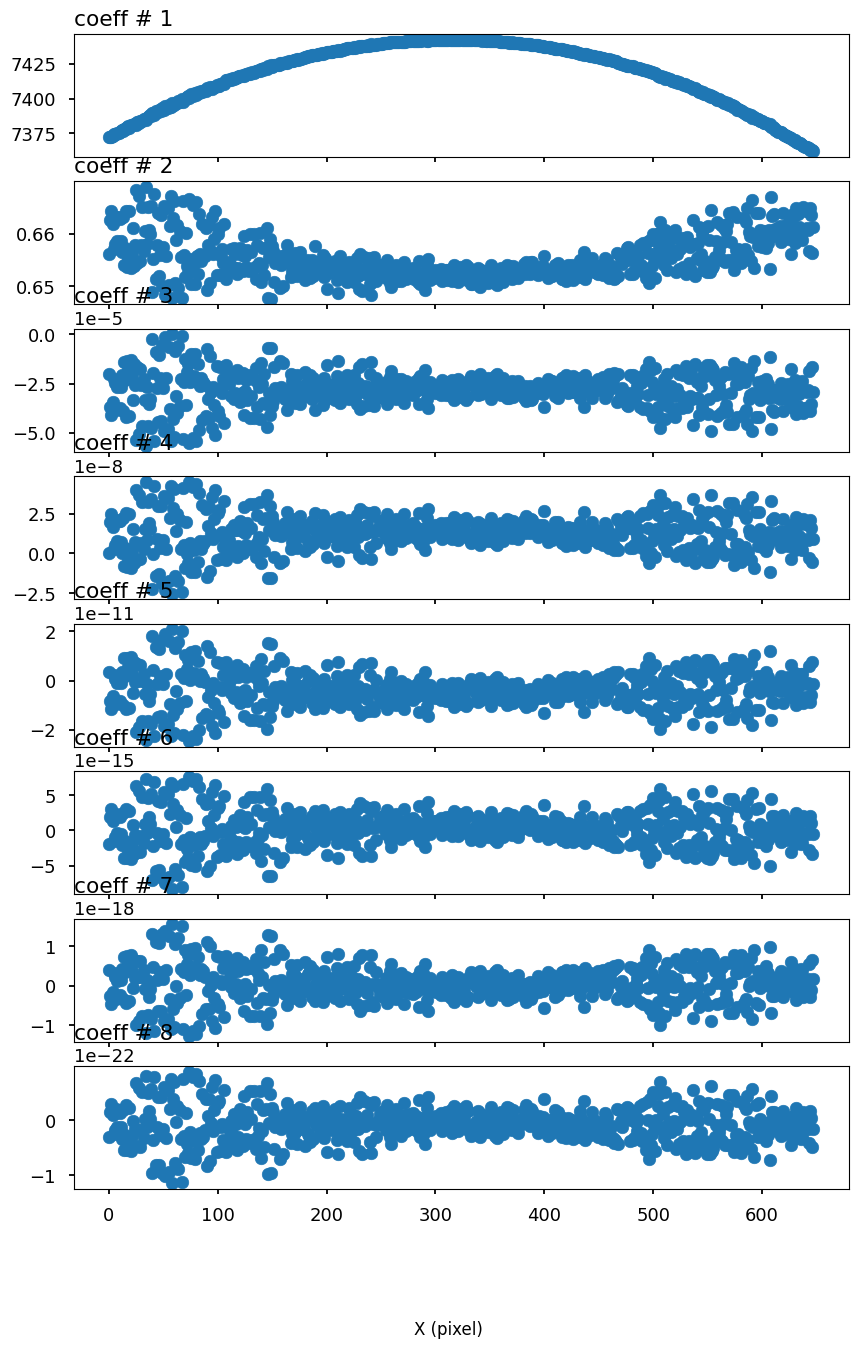

<Figure size 1040x715 with 0 Axes>

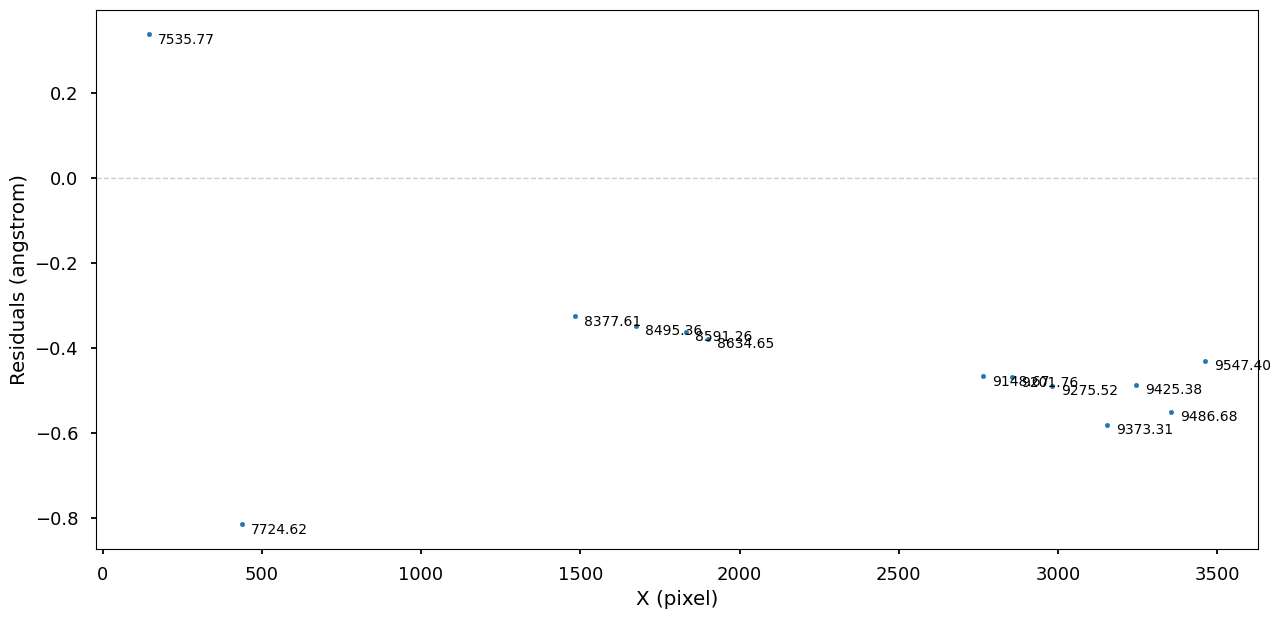

<Figure size 1040x715 with 0 Axes>

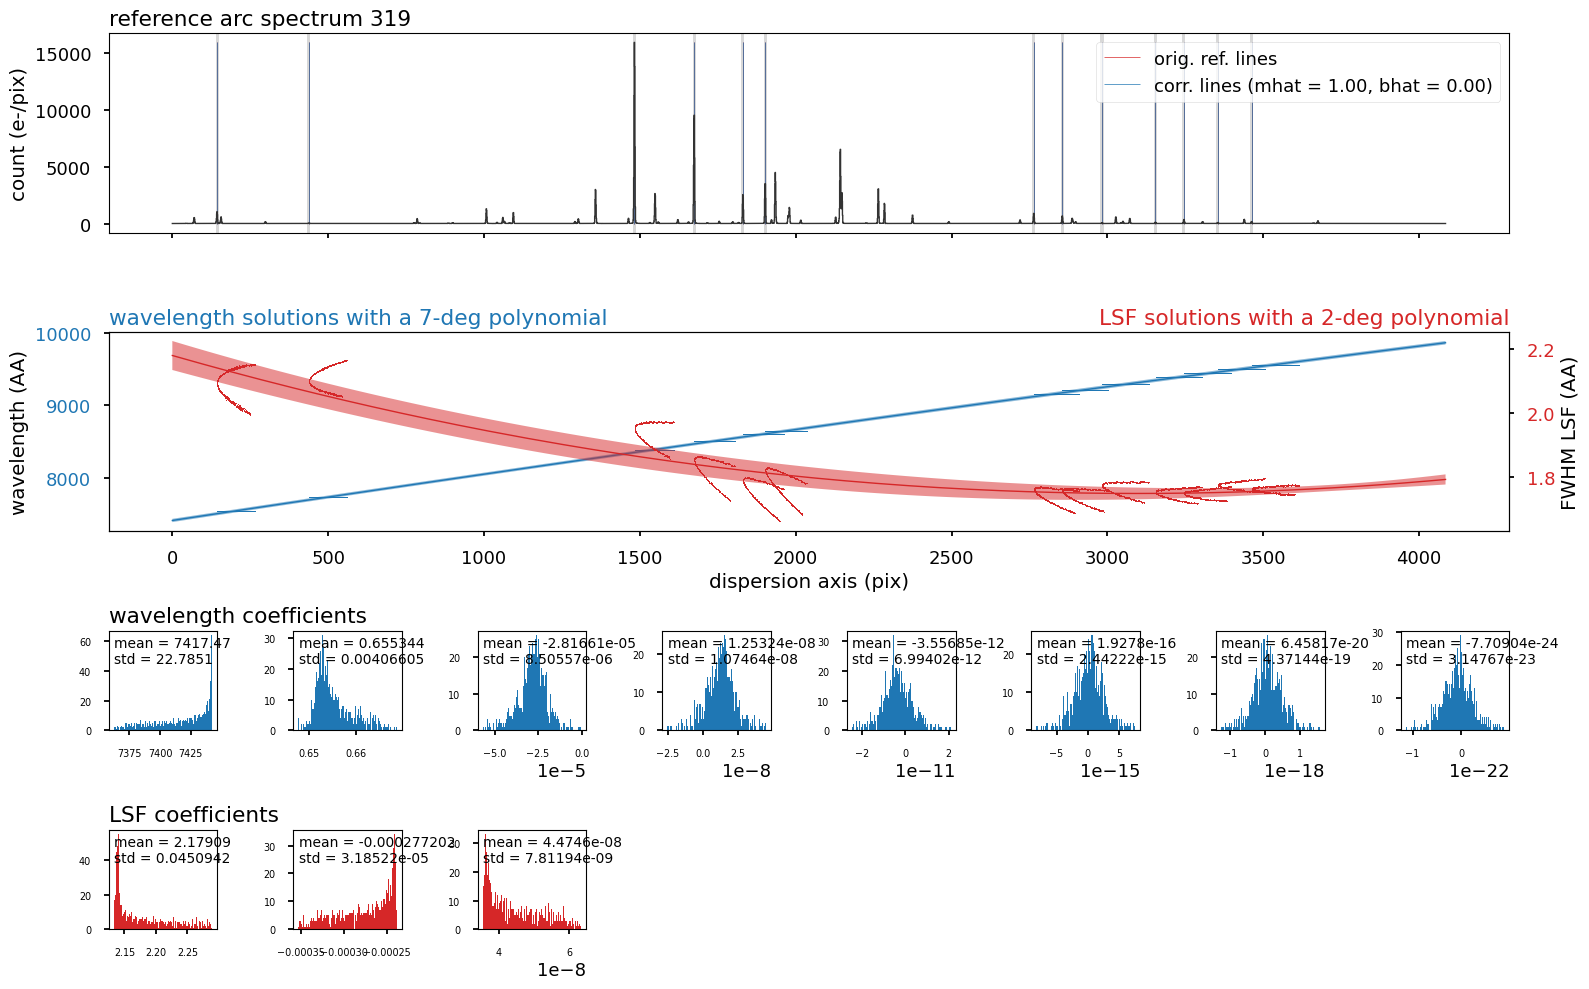

[INFO]: updating header and writing wavelength/LSF to '/home/mejia/Research/UNAM/lvm-drp/lvmdrp/examples/lco_com/data_calib/60177/lvm-mwave_neon-z3.fits' and '/home/mejia/Research/UNAM/lvm-drp/lvmdrp/examples/lco_com/data_calib/60177/lvm-mlsf_neon-z3.fits'


<Figure size 1040x715 with 0 Axes>

In [5]:
ref_fibers = {"r2": 330, "r1": 319, "r3": 319, "z1": 319, "z2": 319, "z3": 319, "b3": 319, "b2": 319, "b1": 319}

mwave_paths, mlsf_paths = [], []
for arc in masters_arc.to_dict("records"):
    camera = arc["camera"]
    
    lamp = MASTER_ARC_LAMPS[camera[0]]

    # define master arc path
    marc_path = path.full("lvm_master", drpver=drpver, tileid=arc["tileid"], mjd=masters_mjd, kind=f"marc_{lamp}", camera=camera)
    warc_path = path.full("lvm_master", drpver=drpver, tileid=arc["tileid"], mjd=masters_mjd, kind=f"wmarc_{lamp}", camera=camera)
    # define master paths
    mtrace_path = os.path.join(masters_path, f"lvm-mtrace-{camera}.fits")
    mwave_path = os.path.join(masters_path, f"lvm-mwave_{lamp}-{camera}.fits")
    mlsf_path = os.path.join(masters_path, f"lvm-mlsf_{lamp}-{camera}.fits")
    mwave_paths.append(mwave_path)
    mlsf_paths.append(mlsf_path)

    _, _, _, _, use_lines = rss._read_pixwav_map(lamp=lamp, camera=camera)
    poly_deg = use_lines.sum() // 2 + 1

    # extract arc
    imageMethod.extract_spectra(in_image=marc_path, out_rss=warc_path, in_trace=mtrace_path, method="aperture", aperture=3)
    # determine wavelength solutions
    rssMethod.determine_wavelength_solution(in_arcs=warc_path, out_wave=mwave_path, out_lsf=mlsf_path, ref_fiber=ref_fibers.get(camera, 319), aperture=12, cc_correction=False,
                                            poly_disp=poly_deg, poly_fwhm=2, poly_cros=2, flux_min=1e-12, fwhm_max=5, rel_flux_limits=[0.001, 1e12], display_plots=True)
    
    # create pixel table
    rssMethod.create_pixel_table(in_rss=warc_path, out_rss=warc_path, arc_wave=mwave_path, arc_fwhm=mlsf_path)
    # resample
    iwave, fwave = SPEC_CHANNELS[camera[0]]
    rssMethod.resample_wavelength(in_rss=warc_path, out_rss=warc_path, method="linear", disp_pix=0.5, start_wave=iwave, end_wave=fwave, err_sim=10, parallel=0, extrapolate=False)

# new_masters = md.extract_metadata(frames_paths=mwave_paths+mlsf_paths)
# md.add_masters(new_masters)